# **Assignment #1**
Due date: **26th September 2025 (Friday), by 11:59PM**

Instructor: Bill Tilford (bill.tilford@sauder.ubc.ca)


# Background

In this assignment, you will learn:

**Part I: WRDS introduction, WRDS connection, and data retrieval guide (15 marks)**

- **What is WRDS**: Understand the basics of Wharton Research Data Service.
- **How to connect to WRDS**: Set up and establish a connection to the WRDS platform.

- **Retrieve data from WRDS**: Learn how to query and extract data for analysis.

**Part II : Calculate mean, variance, and covariance of stock returns (25 marks)**

**Part III: Apply the mean-variance method (60 marks)**:
  - Use historical returns and variance data.
  - Select stocks based on risk-return tradeoffs using portfolio optimization techniques.

## **Part I - WRDS introduction, WRDS connection  and data retrieval guide**  

### 1. What is WRDS?

**WRDS** stands for **Wharton Research Data Service**, a platform providing access to a wide range of financial and business datasets used for academic research.

### 2. How to access WRDS

There are two main ways to access WRDS:

##### 2.1 WRDS website
- Access the website at [https://wrds-www.wharton.upenn.edu/](https://wrds-www.wharton.upenn.edu/)
- Features:
  - **User-friendly interface**: Intuitive design for easy data queries.
  - **Ease of use**: Suitable for researchers of all levels.

Data processed through the WRDS website can only be saved in WRDS but not in the local folder. Therefore, we will not use this approach.

#### 2.2 Python-WRDS connection
In this assignment, we introduce how to connect to WRDS through Python, and retrieve data from WRDS.  
- Benefits:
  - Automates data queries.
  - Enables seamless integration with your Python workflow.
  - Export and save data in the local folder.

First, we need install required packages. The following function ensures the required packages are downloaded and installed properly.

In [ ]:
# check if required packages are installed
import subprocess
import sys

def install_packages(packages):
    """
    Ensure that all specified packages are installed. If a package is not installed,
    it will be installed automatically.

    Args:
        packages (list): A list of package names to ensure are installed.

    Returns:
        None
    """
    for package in packages:
        try:
            __import__(package)
        except ImportError:
            print(f"Installing {package}...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        else:
            print(f"{package} is already installed.")

required_packages = [
    "numpy",
    "scipy",
    "pandas",
    "wrds",
    "matplotlib",
    "pathlib",
    "pandas_datareader",
    "statsmodels",
    "PyPortfolioOpt",
    "seaborn",
    "cvxpy",
    "yfinance",
]
install_packages(required_packages)

numpy is already installed.
scipy is already installed.
pandas is already installed.
Installing wrds...
matplotlib is already installed.
pathlib is already installed.
pandas_datareader is already installed.
statsmodels is already installed.
Installing PyPortfolioOpt...
seaborn is already installed.
cvxpy is already installed.
yfinance is already installed.


We then import packages.

In [ ]:
# wrds
import wrds

# dataframe related
import pandas as pd
import numpy as np

# mean-variance optimization, plot
import matplotlib.pyplot as plt
from pypfopt import expected_returns, risk_models, expected_returns, plotting, EfficientFrontier
import seaborn as sns
import cvxpy as cp
import yfinance as yf

# handle warnings in wrds
import warnings
warnings.filterwarnings("ignore")

# paths
from pathlib import Path
root_path = Path().cwd()
data_path = root_path / 'data'
if not data_path.exists():
    data_path.mkdir()

Then, we enter credentials and connect to wrds.
In the following code, enter the user name and password to connect to wrds.

In [ ]:
# WRDS connection
# wrds_username = 'your_username'
wrds_username = 'eileenbc'

try:
    print("Establishing connection to WRDS database...")
    params = {
        'wrds_hostname': wrds.sql.WRDS_POSTGRES_HOST,
        'wrds_port': wrds.sql.WRDS_POSTGRES_PORT,
        'wrds_dbname': wrds.sql.WRDS_POSTGRES_DB,
        'wrds_username': wrds_username,
        'wrds_connect_args': wrds.sql.WRDS_CONNECT_ARGS,
    }

    conn = wrds.Connection(autoconnect=True, **params)
    print("Successfully connected to WRDS database.")
except Exception as e:
    print(f"Failed to connect to WRDS database: {e}")


Establishing connection to WRDS database...
Enter your WRDS username [eileenbc]:jennycc
Enter your password:··········
WRDS recommends setting up a .pgpass file.
Create .pgpass file now [y/n]?: y
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done
Successfully connected to WRDS database.


### 3. Using the WRDS Package  

#### 3.1 Key Functions in the `wrds` Package  

The following functions are essential for exploring and querying data in WRDS:  

- **`list_libraries`**: Lists all libraries available in your WRDS account.  
- **`list_tables`**: Lists all datasets within a specific library.  
- **`describe_table`**: Lists all variables (columns) in a specific dataset.  
- **`get_table`**: Fetches data from a dataset with optional filters and limits.  
- **`raw_sql`**: Executes a custom SQL query against a dataset.  
- **`get_row_count`**: Returns the number of rows in a dataset.  

#### 3.2 Querying the Dataset Structure (Metadata)  

##### 3.2.1 List All Libraries  

```python
sorted(conn.list_libraries())
```

- Lists all libraries available at WRDS in alphabetical order.  
- Access to a library depends on your subscription.  

##### 3.2.2 List Datasets in a Library  

```python
conn.list_tables(library="library_name")
```

- Replace `"library_name"` with the library you want to query (e.g., `crsp`, `comp`).  

##### 3.2.3 List Variables in a Dataset  

```python
conn.describe_table(library="library_name", table="dataset_name")
```

- Replace `"library_name"` and `"dataset_name"` with appropriate names.  
- Both are case-sensitive and must be lowercase.  

Alternatively, a comprehensive dataset list is available on the WRDS website, detailing libraries, datasets, variables, and previews.  

#### 3.3 Querying WRDS Data  

##### 3.3.1 Using `get_table()`  

Simplifies querying by specifying library, dataset, and optional parameters like columns and `obs`.  

```python
data = conn.get_table(library='djones', table='djdaily', columns=['date', 'dji'], obs=10)
```

##### 3.3.2 Using `raw_sql()`  

The `raw_sql()` function allows you to use basic SQL queries to extract data from a database. Here's an overview of the most fundamental SQL commands:

- **`SELECT`**: Specifies the columns you want to retrieve.  
- **`FROM`**: Indicates the table where the data resides.  
- **`WHERE`**: Adds filtering conditions to retrieve specific rows.  
- **`JOIN`**: Combines data from multiple tables based on a common column.  
- **`LIMIT`**: Restricts the number of rows returned.  

**Basic SQL Syntax**:

```sql
SELECT column1, column2
FROM schema_name.table_name
WHERE condition
JOIN another_table ON table_name.key = another_table.key
LIMIT number_of_rows;
```

**Example Usage in `raw_sql()`**:

```python
data = conn.raw_sql(
    f"""
    SELECT gvkey, datadate, seq, ceq, at, lt, txditc, txdb, itcb, pstkrv,
           pstkl, pstk, capx, oancf, sale, cogs, xint, xsga "
    FROM comp.funda
    WHERE indfmt = 'INDL'
         AND datafmt = 'STD'
         AND consol = 'C'
         AND curcd = 'USD'
         AND datadate BETWEEN '{start_date}' AND '{end_date}'""",
    date_cols=['datadate']
)
```

**Key SQL Components in This Query**:

- **`SELECT`**: Specifies the columns to retrieve. Here, columns like `gvkey`, `datadate`, `seq`, `ceq`, and others are selected.  
- **`FROM`**: Indicates the source table `comp.funda`.  
- **`WHERE`**: Adds filtering conditions:
  - `indfmt = 'INDL'`: Industrial format data.  
  - `datafmt = 'STD'`: Standardized format.  
  - `consol = 'C'`: Consolidated financial data.  
  - `curcd = 'USD'`: Data reported in U.S. dollars.  
  - `datadate BETWEEN '{start_date}' AND '{end_date}'`: Restricts the date range.  
- **`f-string`**: Dynamically injects the `start_date` and `end_date` variables into the query.  
- **`date_cols`**: Ensures the `datadate` column is parsed as a `datetime` object.

##### 3.3.3 Using `get_row_count()`  

Retrieves the row count of a dataset.  

```python
count = conn.get_row_count('djones', 'djdaily')
```

##### 3.3.4 Joining Data from Separate Datasets  

Join datasets for analysis, e.g., combining Compustat Fundamentals (`comp.funda`) with Compustat Pricing (`comp.secm`):  

```python
conn.raw_sql("""
    SELECT a.gvkey, a.datadate, a.tic, a.conm, a.at, a.lt, b.prccm, b.cshoq
    FROM comp.funda a
    JOIN comp.secm b ON a.gvkey = b.gvkey AND a.datadate = b.datadate
    WHERE a.tic = 'IBM' AND a.datafmt = 'STD' AND a.consol = 'C' AND a.indfmt = 'INDL'
""")
```

##### 3.3.5 Passing Parameters to SQL  

The `raw_sql()` method supports parameterized SQL queries:  

```python
params = {"tickers": ("0015B", "0030B", "0032A")}
data = conn.raw_sql(
    "SELECT datadate, gvkey, cusip FROM comp.funda WHERE tic IN %(tickers)s",
    params=params,
)
```



The following code lists the first 10 libraries in WRDS and the first 10 tables names of crsp library.

In [ ]:
print(conn.list_libraries()[0:10])
# We select crsp library, and take a look at the tables.
print(conn.list_tables(library='crsp')[0:10])

# We select library crsp, table name is msf_v2, and take a look at the observations.
crsp_monthly = conn.get_table(library='crsp', table='msf_v2', obs=5)
crsp_monthly.head(3)

['aha_sample', 'ahasamp', 'auditsmp', 'auditsmp_all', 'bank', 'bank_all', 'bank_premium_samp', 'banksamp', 'block', 'block_all']
['acti', 'asia', 'asib', 'asic', 'asio', 'asix', 'bmdebt', 'bmheader', 'bmpaymts', 'bmquotes']


,permno,hdrcusip,permco,siccd,nasdissuno,yyyymm,mthcaldt,mthcompflg,mthcompsubflg,mthprc,...,securitysubtype,sharetype,exchangetier,primaryexch,tradingstatusflg,conditionaltype,mthcumfacpr,mthcumfacshr,shrout,mthfloatshrqty
0,10000,68391610,7952,3990,10396,198601,1986-01-31,Y,Y1,4.375,...,COM,NS,SC1,Q,A,RW,1.0,1.0,3680,<NA>
1,10000,68391610,7952,3990,10396,198602,1986-02-28,G,G1,3.25,...,COM,NS,SC1,Q,A,RW,1.0,1.0,3680,<NA>
2,10000,68391610,7952,3990,10396,198603,1986-03-31,G,G1,4.4375,...,COM,NS,SC1,Q,A,RW,1.0,1.0,3680,<NA>


### 4. Introduction to the CRSP Database

This section introduces the CRSP database, a main database in asset pricing research. For more details, refer to the official documentation: [WRDS Overview of CRSP U.S. Stock Database](https://wrds-www.wharton.upenn.edu/pages/support/manuals-and-overviews/crsp/stocks-and-indices/overview-crsp-us-stock-database/).

- The CRSP U.S. Stock database provides stock prices, returns, and event information.

#### 4.1. General Description

The CRSP U.S. Stock database includes:

- End-of-day and end-of-month prices for primary listings on NYSE, NYSE MKT, NASDAQ, and Arca exchanges.
- Basic market indices.
- Comprehensive corporate action information and highly accurate total return calculations.

#### 4.2. Coverage

##### 4.2.1. Key Features

The CRSP U.S. Stock database contains the following:

- **Price and Quote Data**: Open, close, bid/low, ask/high, trade-only.
- **Returns**:
  - Holding period returns with and without dividends.
  - Excess returns and other derived data items.
- **Market Information**:
  - Market capitalization.
  - Shares outstanding.
  - Trading volume.
- **Corporate Actions**: Includes delisting information.
- **Identifiers and Descriptors**: Supplemental data items for security identification.

##### 4.2.2. Exchange Coverage

- **NYSE**: Data starts from December 31, 1925.
- **NYSE MKT**: Data starts from July 2, 1962.
- **NASDAQ**: Data starts from December 14, 1972.
- **Arca**: Data starts from March 8, 2006.

##### 4.2.3. Market Indices

- Equal and value-weighted returns for CRSP NYSE, NYSE MKT, NASDAQ, and Arca, with and without dividends.
- Composite indices for S&P 500 and NASDAQ.
- **S&P 500 Constituent Data**: Available through the CRSP Indices product.

#### 4.3. Share Type (SHRCD) Coverage

CRSP U.S. Stock includes:

- **Equity Types**:
  - Common stocks.
  - Certificates.
  - ADRs (American Depositary Receipts).
  - Shares of Beneficial Interest.
  - Units (e.g., Depository Units, Units of Limited Partnership Interest).
  - ETFs (Exchange-Traded Funds).
  - Closed-end mutual funds.
- **Special Securities**:
  - Foreign companies traded on major U.S. exchanges.
  - Americus Trust Components (Primes and Scores).
  - HOLDRs Trusts.
  - REITs (Real Estate Investment Trusts).

Refer to the "Share Codes Security Type" section in the official overview for more details.

#### 4.4. Exclusions

The CRSP U.S. Stock database does not include:

- Rights and warrants.
- Preferred shares.
- Units representing common stocks bundled with rights or warrants.
- Over-the-counter securities.
- When-issued trading data.

The following code retrieves data from WRDS library 'crsp', table 'msf_v2', limiting the observations to 5 records.

In [ ]:
crsp_monthly = conn.get_table(library='crsp', table='msf_v2', obs=5)
crsp_monthly

,permno,hdrcusip,permco,siccd,nasdissuno,yyyymm,mthcaldt,mthcompflg,mthcompsubflg,mthprc,...,securitysubtype,sharetype,exchangetier,primaryexch,tradingstatusflg,conditionaltype,mthcumfacpr,mthcumfacshr,shrout,mthfloatshrqty
0,10000,68391610,7952,3990,10396,198601,1986-01-31,Y,Y1,4.375,...,COM,NS,SC1,Q,A,RW,1.0,1.0,3680,<NA>
1,10000,68391610,7952,3990,10396,198602,1986-02-28,G,G1,3.25,...,COM,NS,SC1,Q,A,RW,1.0,1.0,3680,<NA>
2,10000,68391610,7952,3990,10396,198603,1986-03-31,G,G1,4.4375,...,COM,NS,SC1,Q,A,RW,1.0,1.0,3680,<NA>
3,10000,68391610,7952,3990,10396,198604,1986-04-30,G,G1,4.0,...,COM,NS,SC1,Q,A,RW,1.0,1.0,3793,<NA>
4,10000,68391610,7952,3990,10396,198605,1986-05-30,G,G1,3.109375,...,COM,NS,SC1,Q,A,RW,1.0,1.0,3793,<NA>


The following code retrieves data from WRDS Fama-French library 'ff', table 'factors_monthly', limiting the observations to 5 records.  We will use the Fama-French data set later in the course as we address Style Investing.

In [ ]:
ff3_factors_monthly = conn.get_table(library='ff', table='factors_monthly', obs=5)
ff3_factors_monthly

,date,mktrf,smb,hml,rf,year,month,umd,dateff
0,1926-07-01,0.0289,-0.0255,-0.0239,0.0022,1926.0,7.0,<NA>,1926-07-31
1,1926-08-01,0.0264,-0.0114,0.0381,0.0025,1926.0,8.0,<NA>,1926-08-31
2,1926-09-01,0.0038,-0.0136,0.0005,0.0023,1926.0,9.0,<NA>,1926-09-30
3,1926-10-01,-0.0327,-0.0014,0.0082,0.0032,1926.0,10.0,<NA>,1926-10-30
4,1926-11-01,0.0254,-0.0011,-0.0061,0.0031,1926.0,11.0,<NA>,1926-11-30


### 5. Managing WRDS Connections

WRDS allows up to **5 simultaneous connections**. Always close a connection when finished to avoid connection issues:
```python
import wrds
conn = wrds.Connection()
data = conn.raw_sql("SELECT * FROM djones.djdaily")
conn.close()
```


##### **Question 1: Retrieve data from WRDS (15 marks)**

We've provide you how to retrieve data from wrds using wrds.raw_sql, now please get the data from wrds following the instruction:

**1.1 Retrieve data from CRSP library, msf_v2 table (5 marks)**

Variables to be retrieved are:
permno, siccd, mthcaldt, mthret, mthretx, mthcap,ticker

Start date: 12/31/2010

End date: 12/31/2024

**1.2 Retrieve data from Fama-French (ff) library, factors_monthly table (5 marks)** We'll come back to Fama-French library later in the course to help us with Style Investing.

Variables to be retrieved are:
date, mktrf, smb, hml, rf, get the whole table

Start date: 12/31/2010

End date: 12/31/2024

**1.3 Merge CRSP stock price data in 1.1 with Fama-French three factors data in 1.2 (5 marks)**

1.1 Retreive WRDS data from the CRSP library, msf_v2 table, name it 'crsp_monthly'. (5 marks)

In [ ]:
# define start date and end date
start_date = "12/31/2010"
end_date = "12/31/2024"

In [ ]:
crsp_monthly = conn.raw_sql(f"""
    SELECT permno, siccd, mthcaldt, mthret, mthretx, mthcap, ticker
    FROM crsp.msf_v2
    WHERE mthcaldt BETWEEN '{start_date}' AND '{end_date}'""",
    date_cols=['mthcaldt']
)
crsp_monthly = crsp_monthly.rename(columns={'mthcaldt': 'date'})
crsp_monthly.head()

,permno,siccd,date,mthret,mthretx,mthcap,ticker
0,10001,4925,2010-12-31,0.052308,0.047809,82413.68,EGAS
1,10002,6020,2010-12-31,0.063745,0.063745,47096.13,BTFG
2,10025,3081,2010-12-31,0.079002,0.079002,159436.8,AEPI
3,10026,2052,2010-12-31,0.057009,0.054426,894466.08,JJSF
4,10028,5094,2010-12-31,0.043902,0.043902,42089.52,DGSE


1.2 Retrieve data from ff library, factors_monthly table, name it 'ff3_factors_monthly'. (5 marks)

In [ ]:
ff3_factors_monthly = conn.raw_sql(f"""
    SELECT date, mktrf, smb, hml, rf
    FROM ff.factors_monthly
    WHERE date BETWEEN '{start_date}' AND '{end_date}'""",
    date_cols=['date']
)
ff3_factors_monthly.head()

,date,mktrf,smb,hml,rf
0,2011-01-01,0.0198,-0.0229,0.0061,0.0001
1,2011-02-01,0.0348,0.015,0.0118,0.0001
2,2011-03-01,0.0045,0.0249,-0.0184,0.0001
3,2011-04-01,0.029,-0.0042,-0.0244,0.0
4,2011-05-01,-0.0127,-0.0073,-0.0185,0.0


1.3 Merge CRSP stock price data in 1.1 with Fama-French three factors data in 1.2, name it 'cleaned_data'. (5 marks)


hint: pd.merge is the function to merge two dataframes. You can merge two dataframes on a common column. For example, if you want to merge df1 and df2 on column 'date', you can use the following code:
```python
pd.merge(df1, df2, on='date')
```

In [ ]:
crsp_monthly["month"] = crsp_monthly["date"].dt.to_period("M")
ff3_factors_monthly["month"] = (ff3_factors_monthly["date"] + pd.offsets.MonthEnd(0)).dt.to_period("M")

cleaned_data = (
    crsp_monthly.merge(ff3_factors_monthly.drop(columns=["date"]), on="month", how="inner", validate="m:1")
    .drop(columns="month")
    .sort_values(["date", "permno"])
    .reset_index(drop=True)
)

cleaned_data.head()

,permno,siccd,date,mthret,mthretx,mthcap,ticker,mktrf,smb,hml,rf
0,10001,4925,2011-01-31,0.029061,0.024715,84450.52,EGAS,0.0198,-0.0229,0.0061,0.0001
1,10002,6020,2011-01-31,0.041199,0.041199,49036.42,BTFG,0.0198,-0.0229,0.0061,0.0001
2,10025,3081,2011-01-31,0.067052,0.067052,170071.98,AEPI,0.0198,-0.0229,0.0061,0.0001
3,10026,2052,2011-01-31,-0.11961,-0.11961,788710.37,JJSF,0.0198,-0.0229,0.0061,0.0001
4,10028,5094,2011-01-31,0.03271,0.03271,43466.28,DGSE,0.0198,-0.0229,0.0061,0.0001


Note: when the data is large, you can save the data to a pickle file and reload it. The following code achieves this.

In [ ]:
# when the data is large, you can save the data to a pickle file and reload it
# pickling is a way of serializing Python objects into a binary format, which allows you to save the object (in this case, the DataFrame) and load it back later without losing its structure or data types#
cleaned_data.to_pickle(data_path / 'cleaned_data.pkl')
cleaned_data = pd.read_pickle(data_path / 'cleaned_data.pkl')

## **Part II - Calculate the mean, variance, and covariance of stock returns**

In this part, we will calculate the mean, variance, and covariance of stock returns. Let's see an example of how to calculate the mean, variance, and covariance of stock returns:

Assume we have return data for 2 stocks across 2 time periods. Here, "permno" is the unique id of stock.

| permno | date | return |
| ------------- | ------- | ------------------- |
| 101           | 2024-01 | 0.05                |
| 102           | 2024-01 | 0.10                |
| 101           | 2024-02 | -0.02               |
| 102           | 2024-02 | 0.04                |

To calculate the mean and the variance of stock returns programmatically, we can leverage the `groupby` function in pandas. The `groupby` function is particularly useful for aggregating data by specific groups, such as `permno` in this case.


Below is the code to implement calculate mean stock returns, variance of stock returns, and the covariance matrix in pandas:  

In [ ]:
# Here is an example:
import pandas as pd

# Example Data
data = {
    "permno": [101, 102, 101, 102],
    "date": ["2024-01", "2024-01", "2024-02", "2024-02"],
    "return": [0.05, 0.10, -0.02, 0.04],
}

# Create DataFrame
df = pd.DataFrame(data)

# 1. Calculate the mean of stock returns, you can also change 'permno' to 'ticker'
mean_returns = df[['permno','return']].groupby('permno').mean().reset_index()

# 2. Calculate variance of stock returns, you can also change 'permno' to 'ticker'
var_returns = df[['permno','return']].groupby('permno').var().reset_index()

# 3. Calculate covariance of stock returns, you can also change 'permno' to 'ticker'
# note: if you use 'ticker' as key, you need change 'permno' to 'ticker'
def calculate_covariance_returns(df):
    # df is a data frame that in long format (panel data)
    df_wide = df.pivot(index='date', columns='permno', values='return').reset_index()
    df_wide = df_wide.set_index('date')
    cov_matrix = df_wide.cov()

    return cov_matrix

# to format the display, you can apply the following code to limit the digits to 6
np.set_printoptions(precision=6, suppress=True)

# Perform calculations
mean_returns = df[['permno','return']].groupby('permno').mean().reset_index()
var_returns = df[['permno','return']].groupby('permno').var().reset_index()
cov_returns = calculate_covariance_returns(df)

# Display results
print(f"the mean of stock returns are: \n{mean_returns}\n")
print(f"the variance of stock returns are: \n{var_returns}\n")
print(f"the covariance of stock returns are: \n{cov_returns}")

the mean of stock returns are: 
   permno  return
0     101   0.015
1     102   0.070

the variance of stock returns are: 
   permno   return
0     101  0.00245
1     102  0.00180

the covariance of stock returns are: 
permno      101     102
permno                 
101     0.00245  0.0021
102     0.00210  0.0018


#### **Question 2: Calculate the mean, variance, and covariance of stock returns (25 marks)**

With the stock price data you retrieved from WRDS in Question 1, answer the following questions:

**Question 2.1**: Count the number of unique stocks in the data every month, plot it overtime. (5 marks)

**Question 2.2**: Filter the stock returns data you retrieved from WRDS in Question 1 to only include the stock returns for the Dow Jones Stock Index. The 30 tickers that are included in the Dow Jones Index are ["MMM", "AMZN", "AXP", "AMGN", "AAPL", "BA", "CAT", "CVX", "CSCO", "KO", "GS", "HD", "HON", "IBM", "JNJ", "JPM", "MCD", "MRK", "MSFT", "NKE", "NVDA", "PG", "CRM", "SHW", "TRV", "UNH", "VZ", "V", "WMT", "DIS"].

Calculate the excess return for each stock (excess return = stock return - risk free rate) (5 marks)

**Question 2.3**: Calculate the mean and the covariance matrix of the selected stock returns. (10 marks)

**Question 2.4**: Calculate the sharpe ratio of the selected stock returns. Which stock has the highest sharpe ratio? Which stock has the lowest sharpe ratio? (5 marks)

Note: to calculate sharpe ratio, you need:

- calculate mean excess returns for each stock (excess return = stock return - risk free rate)
- calculate the standard deviation for each stock, where standard deviation is the sqrt of variance
- merge the mean excess returns and the standard deviation
- divide the mean excess returns by the standard deviation

If you prefer to work on permno rather than ticker, the following code provides references to map ticker to permno.

In [ ]:
dow_jones_ticker_list = ["MMM", "AMZN", "AXP", "AMGN", "AAPL", "BA", "CAT", "CVX", "CSCO", "KO",
                         "GS", "HD", "HON", "IBM", "JNJ", "JPM", "MCD", "MRK", "MSFT", "NKE", "NVDA",
                         "PG", "CRM", "SHW", "TRV", "UNH", "VZ", "V", "WMT", "DIS"]
len(dow_jones_ticker_list)

unique_tickers_permnos = cleaned_data.loc[cleaned_data['ticker'].isin(dow_jones_ticker_list), ['ticker', 'permno']].drop_duplicates()

unique_tickers_permnos

,ticker,permno
12,MSFT,10107
17,HON,10145
128,KO,11308
453,IBM,12490
519,AMGN,14008
526,CVX,14541
527,AAPL,14593
599,PG,18163
603,CAT,18542
617,BA,19561


2.1 Count the number of unique stocks in the data every month, plot it overtime. (5 marks)

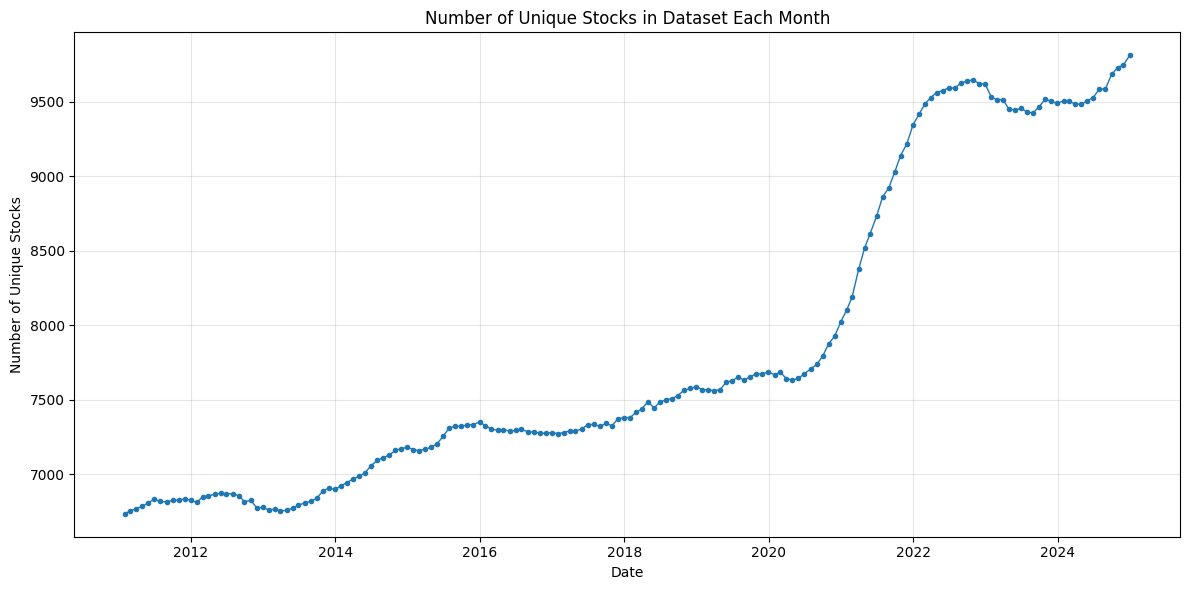

Average stocks per month: 7834
Date range: 2011-01-31 00:00:00 to 2024-12-31 00:00:00


In [ ]:
# Use the cleaned_data which has the complete dataset
monthly_counts = cleaned_data.groupby('date')['permno'].nunique().reset_index(name='unique_stocks')

plt.figure(figsize=(12,6))
plt.plot(monthly_counts['date'], monthly_counts['unique_stocks'], marker='o', linestyle='-', linewidth=1, markersize=3)
plt.title("Number of Unique Stocks in Dataset Each Month")
plt.xlabel("Date")
plt.ylabel("Number of Unique Stocks")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Average stocks per month: {monthly_counts['unique_stocks'].mean():.0f}")
print(f"Date range: {monthly_counts['date'].min()} to {monthly_counts['date'].max()}")

2.2 Filter the stock returns data you retrieved from WRDS in Question 1 to only include the stock returns for the Dow Jones Stock Index, name it as filter_cleaned_data. Calculate the excess return for each stock. (5 marks)

In [ ]:
# Filter the cleaned_data (which already has risk-free rate merged)
filter_cleaned_data = cleaned_data[cleaned_data['ticker'].isin(dow_jones_ticker_list)].copy()

print(f"Found {filter_cleaned_data['ticker'].nunique()} out of {len(dow_jones_ticker_list)} Dow Jones tickers")
print(f"Date range in filtered data: {filter_cleaned_data['date'].min()} to {filter_cleaned_data['date'].max()}")

# Calculate excess returns (stock return - risk-free rate)
filter_cleaned_data['excess_ret'] = filter_cleaned_data['mthret'] - filter_cleaned_data['rf']

# Remove any infinite or extreme values
filter_cleaned_data = filter_cleaned_data[
    (filter_cleaned_data['excess_ret'].notna()) &
    (filter_cleaned_data['excess_ret'] > -1) &  # Remove returns < -100%
    (filter_cleaned_data['excess_ret'] < 2)     # Remove returns > 200% (outliers)
]

print(f"Filtered data shape: {filter_cleaned_data.shape}")
filter_cleaned_data.head()

Found 30 out of 30 Dow Jones tickers
Date range in filtered data: 2011-01-31 00:00:00 to 2024-12-31 00:00:00
Filtered data shape: (5040, 12)


,permno,siccd,date,mthret,mthretx,mthcap,ticker,mktrf,smb,hml,rf,excess_ret
12,10107,7370,2011-01-31,-0.006628,-0.006628,232956040.95,MSFT,0.0198,-0.0229,0.0061,0.0001,-0.006728
17,10145,3724,2011-01-31,0.053612,0.053612,43697489.73,HON,0.0198,-0.0229,0.0061,0.0001,0.053512
128,11308,2087,2011-01-31,-0.044397,-0.044397,145939836.9,KO,0.0198,-0.0229,0.0061,0.0001,-0.044497
453,12490,3571,2011-01-31,0.103843,0.103843,201262482.0,IBM,0.0198,-0.0229,0.0061,0.0001,0.103743
519,14008,2830,2011-01-31,0.003279,0.003279,51334560.0,AMGN,0.0198,-0.0229,0.0061,0.0001,0.003179


2.3 Calculate the mean and the covariance matrix of the selected stock returns. (10 marks)


In [ ]:
# Create a pivot table for easier calculations
returns_pivot = filter_cleaned_data.pivot_table(
    index='date',
    columns='ticker',
    values='excess_ret'
)

# Handle missing values by forward filling then backward filling (limited)
returns_pivot_clean = returns_pivot.ffill(limit=1).bfill(limit=1).dropna(how='all')

print(f"Returns matrix shape: {returns_pivot_clean.shape}")
print(f"Time period: {returns_pivot_clean.index.min()} to {returns_pivot_clean.index.max()}")

# Calculate mean returns for each stock
mean_returns = returns_pivot_clean.mean()
print(f"\nMean excess returns (monthly):")
print(mean_returns.round(6))

# Calculate covariance matrix
cov_matrix = returns_pivot_clean.cov()
print(f"\nCovariance matrix shape: {cov_matrix.shape}")
print("Covariance matrix (first 5x5):")
print(cov_matrix.iloc[:5, :5].round(6))

# Calculate variance for each stock (diagonal of covariance matrix)
var_returns = pd.Series(np.diag(cov_matrix), index=cov_matrix.index)
print(f"\nVariance of returns:")
print(var_returns.round(6))

Returns matrix shape: (168, 30)
Time period: 2011-01-31 00:00:00 to 2024-12-31 00:00:00

Mean excess returns (monthly):
ticker
AAPL     0.02149
AMGN    0.012506
AMZN     0.02166
AXP     0.014128
BA      0.011376
CAT     0.012668
CRM     0.016791
CSCO    0.010182
CVX     0.007571
DIS     0.009278
GS      0.011147
HD      0.017134
HON     0.011307
IBM     0.006621
JNJ     0.007427
JPM     0.014323
KO      0.006355
MCD     0.010233
MMM     0.006942
MRK     0.009497
MSFT     0.01862
NKE     0.010231
NVDA    0.043015
PG       0.00813
SHW      0.01721
TRV     0.011272
UNH     0.017724
V       0.018423
VZ      0.005016
WMT     0.011767
dtype: Float64

Covariance matrix shape: (30, 30)
Covariance matrix (first 5x5):
ticker      AAPL      AMGN      AMZN       AXP        BA
ticker                                                  
AAPL    0.006042  0.001192  0.003076  0.001759  0.002209
AMGN    0.001192  0.004256  0.001040  0.001044  0.001542
AMZN    0.003076  0.001040  0.007154  0.001936  0.0022

2.4 Calculate the sharpe ratio of the selected stocks (5 marks)

In [ ]:
# Calculate standard deviation (sqrt of variance)
std_returns = np.sqrt(var_returns)

# Calculate Sharpe ratio (mean excess return / standard deviation)
# Note: This is monthly Sharpe ratio. For annualized: multiply by sqrt(12)
sharpe_ratios = mean_returns / std_returns

# Create a nice DataFrame for display
sharpe_data = pd.DataFrame({
    'ticker': sharpe_ratios.index,
    'mean_excess_return': mean_returns.values,
    'std_deviation': std_returns.values,
    'sharpe_ratio': sharpe_ratios.values
}).sort_values('sharpe_ratio', ascending=False)

print("Sharpe Ratios for Dow Jones stocks (monthly):")
print(sharpe_data.round(4))

# Find highest and lowest Sharpe ratios
highest_sharpe = sharpe_data.iloc[0]
lowest_sharpe = sharpe_data.iloc[-1]

print(f"\nHighest Sharpe Ratio: {highest_sharpe['ticker']} ({highest_sharpe['sharpe_ratio']:.4f})")
print(f"Lowest Sharpe Ratio: {lowest_sharpe['ticker']} ({lowest_sharpe['sharpe_ratio']:.4f})")

# Calculate annualized Sharpe ratios
sharpe_data['sharpe_ratio_annual'] = sharpe_data['sharpe_ratio'] * np.sqrt(12)
print(f"\nAnnualized Sharpe Ratios:")
print(sharpe_data[['ticker', 'sharpe_ratio_annual']].round(4))

Sharpe Ratios for Dow Jones stocks (monthly):
   ticker  mean_excess_return  std_deviation  sharpe_ratio
27      V              0.0184         0.0549        0.3355
22   NVDA               0.043         0.1300         0.331
20   MSFT              0.0186         0.0598        0.3113
26    UNH              0.0177         0.0576        0.3076
11     HD              0.0171         0.0594        0.2884
0    AAPL              0.0215         0.0777        0.2765
2    AMZN              0.0217         0.0846        0.2561
24    SHW              0.0172         0.0687        0.2504
29    WMT              0.0118         0.0512          0.23
17    MCD              0.0102         0.0453         0.226
3     AXP              0.0141         0.0685        0.2062
25    TRV              0.0113         0.0560        0.2012
12    HON              0.0113         0.0571        0.1979
15    JPM              0.0143         0.0728        0.1967
1    AMGN              0.0125         0.0652        0.1917
6     CRM 

### **Part III - Static Portfolio Choice - Apply mean-variance method based on historical returns and variance**

### **Question 3: Apply mean variance optimization method to estimate the optimal weights. (45 marks)**

In this question, you use the data retrieved in Question 1, the historical mean returns and covariance matrix calculated in Question 2 for the 30 selected stock returns, to apply mean-variance optimization method to determine the optimal weights. The tickers for the 30 stocks are ["MMM", "AMZN", "AXP", "AMGN", "AAPL", "BA", "CAT", "CVX", "CSCO", "KO", "GS", "HD", "HON", "IBM", "JNJ", "JPM", "MCD", "MRK", "MSFT", "NKE", "NVDA", "PG", "CRM", "SHW", "TRV", "UNH", "VZ", "V", "WMT", "DIS"].

 *PyPortfolioOpt* is a package that modulizes the process of portfolio optimization. You need to apply portfolio optimization manually, and then validate with *PyPortfolioOpt*.

- For the optimization package you use, we suggest either *cvxpy (cp.Problem)* or *scipy (scipy.optimize)*.
- Stock returns data in CRSP are on a monthly basis. To calculate the monthly expected return and volatility with *PyPortfolioOpt* package, you need set 'frequency = 1'.

**Question 3.1**
Calculate the expected **monthly** returns `mu` using historical data. Validate your results using PyPortfolioOpt. (5 marks)

**Question 3.2**
Calculate the **monthly** covariance matrix `S` from historical data. **OPTIONAL**: Validate your results using PyPortfolioOpt. (5 marks)

**Question 3.3 Unconstrained optimization (5 marks)**

Determine the portfolio weights of the minimized volatility portfolio.

Calculate the portfolio returns, volatility, and Sharpe Ratio of this minimized volatility portfolio. When calculating the Sharpe ratio, assume **annualized** `risk_free_rate = 0.02`.


**Question 3.4 Constrained optimization with target expected return (5 marks)**

Determine the optimal portfolio that minimizes volatility for a given target expected **monthly** return of 1%. Use the expected monthly returns and monthly covariance matrix calculated above.

Compute the expected **monthly** return, volatility, and Sharpe ratio of the optimized portfolio with target return of 1.75% and compare your results with *PyPortfolioOpt*.  When calculating the Sharpe ratio, assume **monthly** `risk_free_rate = 0.002`.

**Question 3.5 Constrained optimization with target volatility (10 marks)**

Determine the optimal portfolio weights that maximize the Sharpe ratio for a given annualized target risk of 20%. Use the expected returns and covariance matrix calculated above.

Calculate the portfolio returns, volatility, and Sharpe Ratio of the optimized portfolio with target risk 20%. When calculating the Sharpe ratio, assume **monthly** `risk_free_rate = 0.002`.

**Question 3.6 Efficient frontier (15 marks)**

(1).Draw the efficient frontier by determing the minimized volatility portfolios over different target returns. Use target returns ranging from the minimized stock returns you calculated in Quesion 3.3 to 0.1%. You can utilize `ef.efficient_return` from PyPortfolioOpt or implement your own function. (5 marks)

(2).Individual Assets: Plot all individual assets on the expected return-volatility space. Do all individual assets fall below the efficient frontier? Verify and explain. (5 marks)

(3).Efficient Risk Portfolio: Draw the tangency portfolio on the efficient frontier (the portfolio that maximizes the Sharpe ratio). Analyze how the tangency portfolio changes as the risk-free rate varies (monthly `risk_free_rate = 0%`, `0.1%`, `0.2%`). Provide an explanation based on economic intuition, not mathematical derivations. (5 marks)

In [ ]:
returns = filter_cleaned_data.set_index(['date','ticker'])['mthret'].unstack()
returns

ticker,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MSFT,NKE,NVDA,PG,SHW,TRV,UNH,V,VZ,WMT
date,,,,,,,,,,,,,,,,,,,,,
2011-01-31,0.051959,0.003279,-0.057556,0.014757,0.064664,0.040504,-0.021667,0.045477,0.040329,0.036257,...,-0.006628,-0.034418,0.553247,-0.011419,0.011702,0.009873,0.136804,-0.007531,0.008924,0.039681
2011-02-28,0.040935,-0.068083,0.021516,0.00438,0.042407,0.061025,0.024237,-0.122459,0.101027,0.125289,...,-0.035609,0.079413,-0.052676,-0.001267,-0.026524,0.065233,0.037272,0.047953,0.036496,-0.072945
2011-03-31,-0.013314,0.041301,0.039471,0.037411,0.026663,0.081803,0.009904,-0.072791,0.036048,-0.014861,...,-0.044771,-0.146791,-0.185349,-0.022998,0.022772,-0.001459,0.064494,0.007803,0.043879,0.008286
2011-04-29,0.004656,0.063611,0.087048,0.090064,0.079129,0.040673,0.037581,0.021574,0.018141,0.000232,...,0.020874,0.087451,0.083424,0.062211,-0.020241,0.063887,0.089159,0.061125,-0.007094,0.056292
2011-05-31,-0.006569,0.064908,0.004494,0.051345,-0.016741,-0.083268,0.098557,-0.041096,-0.033946,-0.034107,...,-0.028812,0.025875,0.002,0.032358,0.071973,-0.018963,-0.005688,0.03958,-0.022499,0.01101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,0.032345,0.011119,-0.045352,0.02217,-0.088458,0.028596,-0.022798,0.043137,-0.067786,-0.035329,...,-0.001116,0.113011,0.020082,0.067057,0.05506,0.053733,0.024368,0.042358,0.031096,0.128324
2024-09-30,0.017467,-0.034808,0.043866,0.048521,-0.124899,0.098343,0.084001,0.053027,-0.004596,0.064284,...,0.031548,0.065797,0.017426,0.009677,0.0333,0.03104,-0.005822,-0.005138,0.074916,0.045578
2024-10-31,-0.030429,-0.006362,0.000376,-0.001604,-0.017956,-0.034674,0.064521,0.036948,0.010525,0.000104,...,-0.055659,-0.127489,0.093215,-0.040701,-0.06,0.050487,-0.034515,0.054192,-0.047104,0.014861


3.1 Calculate the expected **monthly** returns `mu` using historical data. Validate your results using PyPortfolioOpt.

In [ ]:
# Calculate expected monthly returns mu
mu = returns.mean(skipna=True)

print("Manual Expected Monthly Returns:")
print(mu.sort_values())

# PyPortfolioOpt validation
from pypfopt.expected_returns import mean_historical_return
mu_pyp = mean_historical_return(
    returns,
    frequency=1,
    log_returns=False,
    returns_data=True
)

print("\nPyPortfolioOpt Expected Monthly Returns:")
print(mu_pyp.sort_values())

# Compare using difference
mu_diff = mu - mu_pyp

print("Difference (manual - PyPortfolioOpt):")
print(mu_diff)

# All the differences are close to zero

Manual Expected Monthly Returns:
ticker
VZ      0.006019
KO      0.007357
IBM     0.007623
MMM     0.007945
JNJ     0.008429
CVX     0.008574
PG      0.009132
DIS      0.01028
MRK     0.010499
CSCO    0.011185
NKE     0.011233
MCD     0.011235
GS       0.01215
TRV     0.012274
HON      0.01231
BA      0.012379
WMT      0.01277
AMGN    0.013509
CAT     0.013671
AXP      0.01513
JPM     0.015325
CRM     0.017793
HD      0.018136
SHW     0.018213
UNH     0.018726
V       0.019425
MSFT    0.019622
AAPL    0.022493
AMZN    0.022662
NVDA    0.044017
dtype: Float64

PyPortfolioOpt Expected Monthly Returns:
ticker
VZ      0.004799
IBM     0.005706
MMM     0.006017
CVX     0.006091
KO      0.006388
BA      0.007312
DIS     0.007333
JNJ     0.007495
PG      0.008168
NKE     0.008576
GS      0.008829
CSCO    0.008834
MRK     0.009105
MCD     0.010234
CAT     0.010243
HON     0.010726
TRV      0.01073
AMGN    0.011429
WMT     0.011464
JPM     0.012652
AXP     0.012777
CRM     0.013913
SHW     0.01

3.2 Calculate the **monthly** covariance matrix `S` from historical data. Validate your results using PyPortfolioOpt.

In [ ]:
# Calculate monthly covariance matrix S
S = returns.cov()
print("Manual monthly covariance matrix:\n", S.iloc[:30, :30], "\n")

# Validate with PyPortfolioOpt
from pypfopt.risk_models import sample_cov
S_pyp = sample_cov(
    returns,
    frequency=1,
    returns_data=True
)

print("PyPortfolioOpt monthly covariance matrix:\n", S_pyp.iloc[:30, :30], "\n")

# Compare using difference
S_diff = S - S_pyp
max_abs_diff = S_diff.abs().to_numpy().max()

print("Max absolute difference:", max_abs_diff)


Manual monthly covariance matrix:
 ticker      AAPL      AMGN      AMZN       AXP        BA       CAT       CRM  \
ticker                                                                         
AAPL    0.006037  0.001184  0.003075  0.001762  0.002200  0.001594  0.003347   
AMGN    0.001184  0.004244  0.001035  0.001044  0.001529  0.001646  0.000971   
AMZN    0.003075  0.001035  0.007156  0.001943  0.002237  0.001524  0.004070   
AXP     0.001762  0.001044  0.001943  0.004708  0.003702  0.002862  0.002660   
BA      0.002200  0.001529  0.002237  0.003702  0.009924  0.002914  0.002944   
CAT     0.001594  0.001646  0.001524  0.002862  0.002914  0.007037  0.002558   
CRM     0.003347  0.000971  0.004070  0.002660  0.002944  0.002558  0.008117   
CSCO    0.002018  0.001147  0.002083  0.002083  0.002539  0.002385  0.002082   
CVX     0.001172  0.001525  0.000956  0.002761  0.002815  0.003365  0.001334   
DIS     0.002046  0.001014  0.002436  0.003228  0.003265  0.002763  0.002968   
GS   

3.3. Unconstrained optimization

Determine the portfolio weights of the minimized volatility portfolio.

Calculate the portfolio returns, volatility, and Sharpe Ratio of this minimized volatility portfolio. When calculating the Sharpe ratio, assume **annualized** `risk_free_rate = 0.02`.

In [ ]:
tickers = mu.index.intersection(S.columns)
mu = mu.loc[tickers].astype(float)
S  = S.loc[tickers, tickers].astype(float)

mu_v  = mu.to_numpy()           # (n,)
Sigma = S.to_numpy()            # (n, n)
n = len(tickers)

# Minimum-variance portfolio
w = cp.Variable(n)
constraints = [cp.sum(w) == 1, w >= 0]
objective   = cp.Minimize(cp.quad_form(w, Sigma))
prob = cp.Problem(objective, constraints)
prob.solve()

# Extract clean weights
w_gmv = pd.Series(np.array(w.value).ravel(), index=tickers, name="w_gmv_long_only")
w_gmv = w_gmv.clip(lower=0)
w_gmv /= w_gmv.sum()

# Portfolio stats (monthly & annual)
ret_m = float(w_gmv @ mu)
vol_m = float(np.sqrt(w_gmv.values @ Sigma @ w_gmv.values))

ret_a = ret_m * 12.0
vol_a = vol_m * np.sqrt(12.0)

rf_a = 0.02
sharpe_a = (ret_a - rf_a) / vol_a

print("Long-only GMV weights--top 10:")
print(w_gmv.sort_values(ascending=False).head(10).round(4), "\n")

print(f"Monthly expected return:  {ret_m:.6f}")
print(f"Monthly volatility:       {vol_m:.6f}")
print(f"Annual expected return:   {ret_a:.6f}")
print(f"Annual volatility:        {vol_a:.6f}")
print(f"Annual Sharpe (rf=0.02):  {sharpe_a:.6f}")


Long-only GMV weights--top 10:
ticker
PG      0.1538
VZ      0.1433
WMT     0.1125
MCD     0.0987
UNH     0.0979
MRK     0.0914
JNJ     0.0748
KO      0.0616
AMZN    0.0388
MSFT    0.0376
Name: w_gmv_long_only, dtype: float64 

Monthly expected return:  0.011412
Monthly volatility:       0.031580
Annual expected return:   0.136942
Annual volatility:        0.109395
Annual Sharpe (rf=0.02):  1.068987


3.4 Constrainted optimization with target expected returns

Determine the optimal portfolio that minimizes volatility for a given target **monthly** expected return of 1.75%. Use the expected returns and covariance matrix calculated above.

Compute the **monthly** expected return, volatility, and Sharpe ratio of the optimized Minimum Volatility Portfolio with target **monthly** expected return of 1.75%, and compare your results with PyPortfolioOpt. When calculating the Sharpe ratio, assume `risk_free_rate = 0.002`.


In [ ]:
tickers = mu.index.intersection(S.columns)
mu = mu.loc[tickers]
S  = S.loc[tickers, tickers]

mu_v   = mu.to_numpy(dtype=float)
Sigma  = S.to_numpy(dtype=float)
n      = len(tickers)

target_ret = 0.0175
rf_m      = 0.002


# Constrained min-vol with target return (cvxpy)
w = cp.Variable(n)

constraints = [
    cp.sum(w) == 1,
    w >= 0,
    mu_v @ w >= target_ret
]
objective = cp.Minimize(cp.quad_form(w, Sigma))
prob = cp.Problem(objective, constraints)
prob.solve()

if prob.status not in ("optimal", "optimal_inaccurate"):
    raise ValueError(f"Infeasible target {target_ret:.2%} (status={prob.status}). "
                     "Lower the target or relax constraints.")

# Clean weights
w_man = pd.Series(np.array(w.value).flatten(), index=tickers, name="w_minvol_target")
w_man = w_man.clip(lower=0)
w_man /= w_man.sum()

# Portfolio monthly stats
ret_m_man = float(w_man @ mu)
vol_m_man = float(np.sqrt(w_man.values @ Sigma @ w_man.values))
sharpe_m_man = (ret_m_man - rf_m) / vol_m_man

print("Min-Vol (manual, long-only) weights -- top 10:")
print(w_man.sort_values(ascending=False).head(10), "\n")
print(f"[Manual] Monthly return:   {ret_m_man:.6f}")
print(f"[Manual] Monthly vol:      {vol_m_man:.6f}")
print(f"[Manual] Monthly Sharpe:   {sharpe_m_man:.6f}  (rf={rf_m})")

# PyPortfolioOpt validation
from pypfopt.efficient_frontier import EfficientFrontier

mu_pyp = mu.astype(float)
S_pyp = S.astype(float)

ef = EfficientFrontier(mu_pyp, S_pyp, weight_bounds=(0, 1))  # long-only
ef.efficient_return(target_return=target_ret)
w_pyo = pd.Series(ef.clean_weights(), dtype=float).reindex(tickers).fillna(0)

ret_p, vol_p, sharpe_p = ef.portfolio_performance(risk_free_rate=rf_m)
print("\n[PyPortfolioOpt] Monthly return:  {:.6f}".format(ret_p))
print("[PyPortfolioOpt] Monthly vol:     {:.6f}".format(vol_p))
print("[PyPortfolioOpt] Monthly Sharpe:  {:.6f}  (rf={})".format(sharpe_p, rf_m))

# Compare by differences
compare_w = pd.concat([w_man.rename("manual"), w_pyo.rename("pypfopt")], axis=1)
compare_w["diff"] = compare_w["manual"] - compare_w["pypfopt"]
print("\nLargest weight differences (manual - pypfopt):")
print(compare_w.reindex(compare_w["diff"].abs().sort_values(ascending=False).index).head(10))

Min-Vol (manual, long-only) weights -- top 10:
ticker
UNH     0.215190
V       0.158240
PG      0.128844
WMT     0.116762
MRK     0.088336
MCD     0.085689
MSFT    0.082408
NVDA    0.071223
AMZN    0.041066
TRV     0.007582
Name: w_minvol_target, dtype: float64 

[Manual] Monthly return:   0.017500
[Manual] Monthly vol:      0.035574
[Manual] Monthly Sharpe:   0.435718  (rf=0.002)

[PyPortfolioOpt] Monthly return:  0.017500
[PyPortfolioOpt] Monthly vol:     0.035574
[PyPortfolioOpt] Monthly Sharpe:  0.435718  (rf=0.002)

Largest weight differences (manual - pypfopt):
          manual  pypfopt          diff
ticker                                 
PG      0.128844  0.12884  3.962606e-06
AMZN    0.041066  0.04107 -3.826398e-06
MRK     0.088336  0.08834 -3.614024e-06
NVDA    0.071223  0.07122  2.935308e-06
MSFT    0.082408  0.08241 -2.460115e-06
TRV     0.007582  0.00758  2.183814e-06
WMT     0.116762  0.11676  1.908026e-06
MCD     0.085689  0.08569 -1.452461e-06
V       0.158240  0.15824 

3.5 Constrained optimization with target volatility

Determine the optimal portfolio weights that maximize the Sharpe ratio for a given target **annualized** risk of 20%. Use the expected returns and covariance matrix calculated above.

Calculate the portfolio returns, volatility, and Sharpe Ratio of the optimized portfolio with **annualize** target risk 20%. When calculating the Sharpe ratio, assume **annualize** `risk_free_rate = 0.02`.

In [ ]:
from math import sqrt

tickers = mu.index.intersection(S.columns)
mu = mu.loc[tickers]
S  = S.loc[tickers, tickers]

mu_v  = mu.to_numpy(dtype=float)
Sigma = S.to_numpy(dtype=float)
n = len(tickers)

# Targets
sigma_target_a = 0.20
sigma_target_m = sigma_target_a / sqrt(12)
rf_a = 0.02
rf_m = rf_a / 12.0

# Excess mean (monthly)
mu_excess = mu_v - rf_m

# Constrained optimization portfolio with target risk
w = cp.Variable(n)

constraints = [
    cp.sum(w) == 1,
    w >= 0,
    cp.quad_form(w, Sigma) <= sigma_target_m**2
]

# At fixed variance, maximizing Sharpe is equivalent to maximizing excess return
objective = cp.Maximize(mu_excess @ w)

prob = cp.Problem(objective, constraints)
prob.solve()

if prob.status not in ("optimal", "optimal_inaccurate"):
    raise ValueError(f"Target risk {sigma_target_a:.0%} infeasible under constraints (status={prob.status}).")

w_opt = pd.Series(np.array(w.value).flatten(), index=tickers, name="w_maxSharpe_at_20pct_ann_risk")
# clean tiny numerical negatives
w_opt = w_opt.clip(lower=0); w_opt /= w_opt.sum()

# Portfolio stats (monthly)
ret_m   = float(mu_v @ w_opt.values)
vol_m   = float(np.sqrt(w_opt.values @ Sigma @ w_opt.values))
sharpe_m = (ret_m - rf_m) / vol_m

# Annualized stats
ret_a   = ret_m * 12.0
vol_a   = vol_m * sqrt(12.0)
sharpe_a = (ret_a - rf_a) / vol_a

print("Max-Sharpe (long-only) weights at 20% annual risk — top 10:")
print(w_opt.sort_values(ascending=False).head(10), "\n")

print(f"[Manual] Monthly return:   {ret_m:.6f}")
print(f"[Manual] Monthly vol:      {vol_m:.6f}  (target ~ {sigma_target_m:.6f})")
print(f"[Manual] Monthly Sharpe:   {sharpe_m:.6f}  (rf_m={rf_m:.6f})")
print(f"[Manual] Annual  return:   {ret_a:.6f}")
print(f"[Manual] Annual  vol:      {vol_a:.6f}  (target 0.200000)")
print(f"[Manual] Annual  Sharpe:   {sharpe_a:.6f}  (rf_a={rf_a:.3f})")


Max-Sharpe (long-only) weights at 20% annual risk — top 10:
ticker
V       3.290403e-01
UNH     3.287726e-01
NVDA    3.210943e-01
AMZN    2.108902e-02
AAPL    1.169354e-06
MSFT    7.505274e-07
HD      2.821350e-07
SHW     2.298812e-07
WMT     1.494895e-07
AMGN    1.250328e-07
Name: w_maxSharpe_at_20pct_ann_risk, dtype: float64 

[Manual] Monthly return:   0.027160
[Manual] Monthly vol:      0.057735  (target ~ 0.057735)
[Manual] Monthly Sharpe:   0.441557  (rf_m=0.001667)
[Manual] Annual  return:   0.325919
[Manual] Annual  vol:      0.200000  (target 0.200000)
[Manual] Annual  Sharpe:   1.529597  (rf_a=0.020)


3.6 Efficient Frontier

(1).Draw the efficient frontier by determing the minimized volatility portfolios over different target returns. Use target returns ranging from the minimized stock returns you calculated in Quesion 3.3 to 0.1%. You can utilize `ef.efficient_return` from PyPortfolioOpt or implement your own function.

(2).Individual Assets: Plot all individual assets on the expected return-volatility space. Do all individual assets fall below the efficient frontier? Verify and explain.

(3).Efficient Risk Portfolio: Draw the tangency portfolio on the efficient frontier (the portfolio that maximizes the Sharpe ratio). Analyze how the tangency portfolio changes as the **annualized** risk-free rate varies (`risk_free_rate = 0%`, `2%`, `4%`). Provide an explanation based on economic intuition, not mathematical derivations.



3.6 Efficient Frontier Analysis
Starting efficient frontier analysis...
(1) Generating efficient frontier...
Tangency portfolio (rf=0.0% annual): Return=0.0204, Vol=0.0405, Sharpe=0.5043
Tangency portfolio (rf=2.0% annual): Return=0.0214, Vol=0.0426, Sharpe=0.4641
Tangency portfolio (rf=4.0% annual): Return=0.0227, Vol=0.0454, Sharpe=0.4261


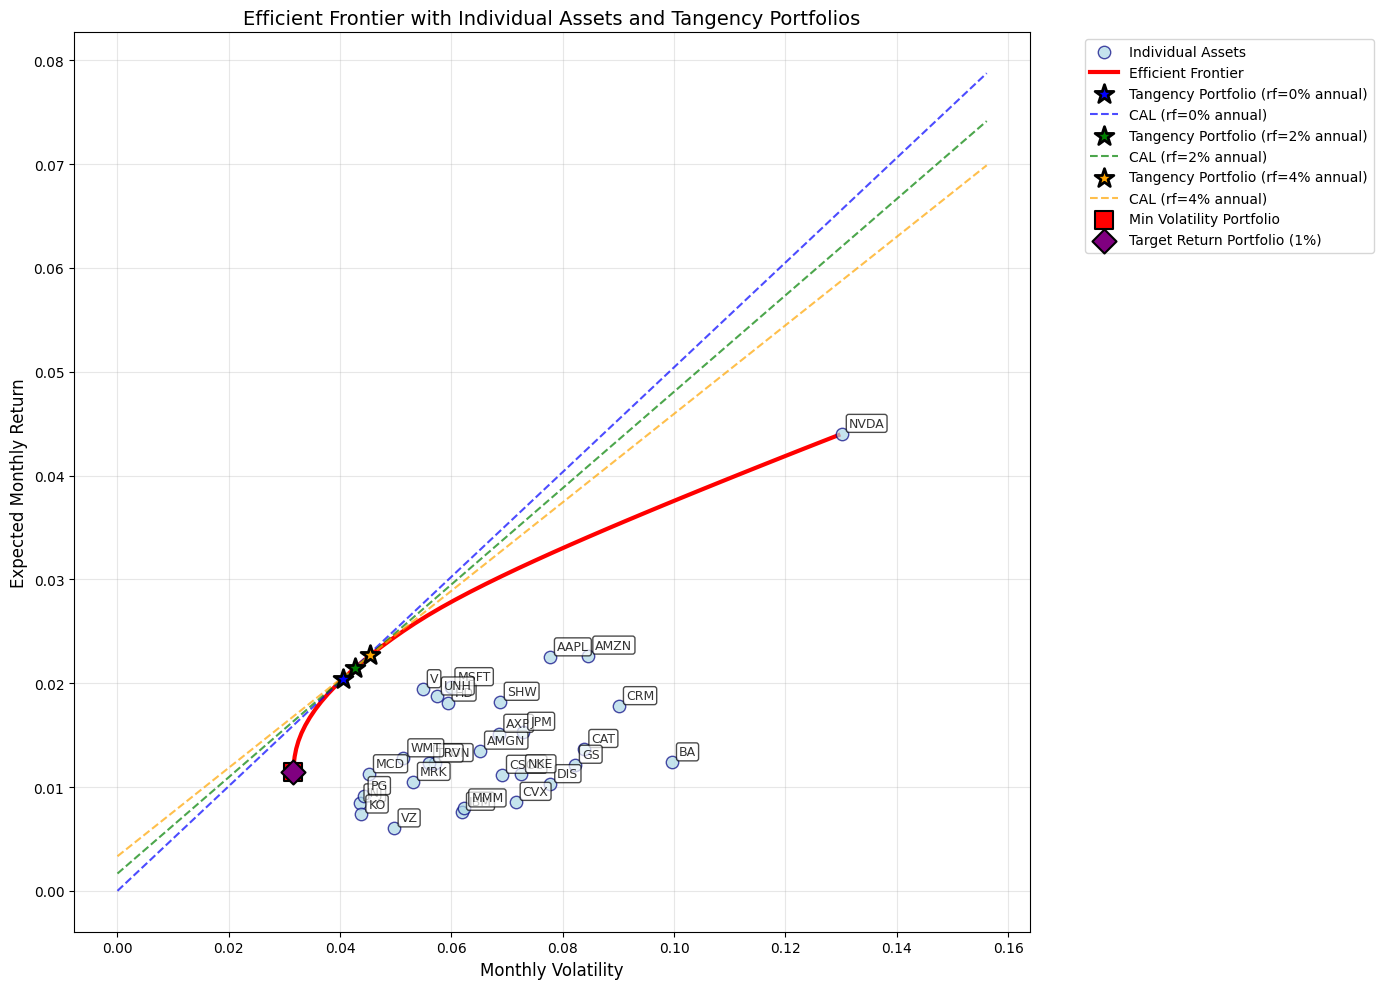


Verifying individual assets vs efficient frontier:
AAPL: Dominated (Asset: 0.0225, 0.0777) vs EF: 0.0325
AMGN: Dominated (Asset: 0.0135, 0.0651) vs EF: 0.0293
AMZN: Dominated (Asset: 0.0227, 0.0846) vs EF: 0.0341
AXP: Dominated (Asset: 0.0151, 0.0686) vs EF: 0.0302
BA: Dominated (Asset: 0.0124, 0.0996) vs EF: 0.0375
CAT: Dominated (Asset: 0.0137, 0.0839) vs EF: 0.0339
CRM: Dominated (Asset: 0.0178, 0.0901) vs EF: 0.0354
CSCO: Dominated (Asset: 0.0112, 0.0691) vs EF: 0.0303
CVX: Dominated (Asset: 0.0086, 0.0715) vs EF: 0.0309
DIS: Dominated (Asset: 0.0103, 0.0778) vs EF: 0.0325
GS: Dominated (Asset: 0.0121, 0.0822) vs EF: 0.0335
HD: Dominated (Asset: 0.0181, 0.0593) vs EF: 0.0276
HON: Dominated (Asset: 0.0123, 0.0570) vs EF: 0.0269
IBM: Dominated (Asset: 0.0076, 0.0619) vs EF: 0.0284
JNJ: Dominated (Asset: 0.0084, 0.0435) vs EF: 0.0218
JPM: Dominated (Asset: 0.0153, 0.0729) vs EF: 0.0313
KO: Dominated (Asset: 0.0074, 0.0438) vs EF: 0.0220
MCD: Dominated (Asset: 0.0112, 0.0452) vs EF: 0

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.risk_models import sample_cov
from pypfopt.expected_returns import mean_historical_return

# Define helper functions
def solve_min_vol_portfolio(mu, S):
    """Solves for the minimum volatility portfolio (long-only)."""
    n = len(mu)
    w = cp.Variable(n)
    constraints = [cp.sum(w) == 1, w >= 0]
    objective = cp.Minimize(cp.quad_form(w, S))
    prob = cp.Problem(objective, constraints)
    prob.solve()
    if prob.status not in ("optimal", "optimal_inaccurate"):
        raise ValueError("Infeasible for min vol portfolio.")
    weights = pd.Series(np.array(w.value).ravel(), index=mu.index, name="w_min_vol")
    return weights.clip(lower=0) / weights.sum()


def solve_target_return_portfolio(mu, S, target_ret, rf_monthly):
    """Solves for the portfolio with minimum volatility at a target return (long-only)."""
    n = len(mu)
    w = cp.Variable(n)
    constraints = [
        cp.sum(w) == 1,
        w >= 0,
        mu.values @ w >= target_ret
    ]
    objective = cp.Minimize(cp.quad_form(w, S))
    prob = cp.Problem(objective, constraints)
    prob.solve()
    if prob.status not in ("optimal", "optimal_inaccurate"):
        raise ValueError(f"Infeasible target {target_ret:.2%} (status={prob.status}). Lower the target or relax constraints.")

    weights = pd.Series(np.array(w.value).flatten(), index=mu.index, name="w_target_ret")
    weights = weights.clip(lower=0) / weights.sum()

    ret_m = float(weights @ mu)
    vol_m = float(np.sqrt(weights.values @ S.values @ weights.values))
    sharpe_m = (ret_m - rf_monthly) / vol_m
    return weights, ret_m, vol_m, sharpe_m


def solve_max_sharpe_portfolio(mu, S, rf_monthly):
    """Solves for the portfolio that maximizes Sharpe ratio (long-only)."""
    # Use PyPortfolioOpt for simplicity as manual implementation is more complex
    ef = EfficientFrontier(mu.astype(float), S.astype(float), weight_bounds=(0, 1))
    ef.max_sharpe(risk_free_rate=rf_monthly)
    weights = pd.Series(ef.clean_weights(), dtype=float).reindex(mu.index).fillna(0)

    ret_m, vol_m, sharpe_m = ef.portfolio_performance(risk_free_rate=rf_monthly)
    return weights, ret_m, vol_m, sharpe_m


# Ensure mu and S are clean float dtypes before passing
mu_clean = returns.mean(skipna=True).astype(float)
S_clean  = returns.cov().astype(float)


# Calculate key portfolios for plotting reference
# Min Volatility Portfolio
w_min_vol = solve_min_vol_portfolio(mu_clean, S_clean)
ret_min_vol = float(w_min_vol @ mu_clean)
vol_min_vol = float(np.sqrt(w_min_vol.values @ S_clean.values @ w_min_vol.values))

# Target Return Portfolio (1%) - This is now part of plotting, but keep variables if needed elsewhere
target_ret_1pct = ret_min_vol * 1.01
rf_monthly_002 = 0.001
# We'll recalculate and plot this in the main plotting function

print("\n3.6 Efficient Frontier Analysis")

def plot_efficient_frontier(mu, S, returns_df):
    """Plots the efficient frontier, individual assets, and tangency portfolios."""

    # (1) Generate efficient frontier points
    print("(1) Generating efficient frontier...")

    # Use PyPortfolioOpt for generating the frontier points
    ef = EfficientFrontier(mu.astype(float), S.astype(float), weight_bounds=(0, 1))

    # Determine the range of returns for the efficient frontier
    # Use the min volatility return as the lower bound
    # Use the max return among individual assets as a guide for the upper bound
    min_ret_for_frontier = solve_min_vol_portfolio(mu, S)
    min_vol_ret = float(min_ret_for_frontier @ mu)

    max_individual_ret = mu.max()
    # Create a range of target returns from min_vol_ret up to slightly above max_individual_ret
    target_returns = np.linspace(min_vol_ret, max_individual_ret * 1.1, 50) # Adjust range as needed

    frontier_points = []
    for target in target_returns:
        try:
            ef_point = EfficientFrontier(mu.astype(float), S.astype(float), weight_bounds=(0, 1))
            # ef_point.efficient_return can sometimes fail for extreme targets
            ef_point.efficient_return(target_return=target)
            ret, vol, _ = ef_point.portfolio_performance(risk_free_rate=0.0) # Use 0 rf for plotting on return-vol space
            frontier_points.append((vol, ret))
        except Exception as e:
             # print(f"Skipping target {target:.4f} due to error: {e}") # Optional: debug why some points fail
             continue # Skip infeasible points


    frontier_df = pd.DataFrame(frontier_points, columns=["vol_m","ret_m"]).sort_values("vol_m")

    if frontier_df.empty:
        print("ERROR: Could not generate any efficient frontier points.")
        return None, None, None

    # (2) Plot individual assets
    individual_rets = mu.values.astype(float)
    individual_vols = np.sqrt(np.diag(S.values.astype(float)))
    assets_df = pd.DataFrame({"vol_m": individual_vols, "ret_m": individual_rets}, index=mu.index)


    # (3) Plot tangency portfolios for different risk-free rates (ANNUAL as specified)
    risk_free_rates_annual = [0.00, 0.02, 0.04]  # 0%, 2%, 4% ANNUAL as per instructions
    risk_free_rates_monthly = [r/12 for r in risk_free_rates_annual]
    colors = ['blue', 'green', 'orange']

    tangency_portfolios = []

    for i, (rf_annual, rf_monthly) in enumerate(zip(risk_free_rates_annual, risk_free_rates_monthly)):
        try:
            # Calculate max Sharpe portfolio (long-only)
            # Use the helper function to get weights and performance
            w_tangency, ret_tangency, vol_tangency, sharpe_tangency = solve_max_sharpe_portfolio(
                mu.astype(float), S.astype(float), rf_monthly
            )

            tangency_portfolios.append({
                'weights': w_tangency,
                'return': ret_tangency,
                'volatility': vol_tangency,
                'sharpe': sharpe_tangency,
                'rf_annual': rf_annual,
                'color': colors[i]
            })

        except Exception as e:
            print(f"Error calculating tangency portfolio for rf={rf_annual*100}%: {e}")

    # Create the plot
    plt.figure(figsize=(14, 10))

    # Plot individual assets
    plt.scatter(assets_df["vol_m"], assets_df["ret_m"],
               alpha=0.7, s=80, c='lightblue', edgecolors='navy', linewidth=1,
               label='Individual Assets', zorder=3)

    # Add ticker labels
    for i, ticker in enumerate(assets_df.index):
        plt.annotate(ticker, (assets_df["vol_m"].iloc[i], assets_df["ret_m"].iloc[i]),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=9, alpha=0.8,
                    bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))

    # Plot efficient frontier
    plt.plot(frontier_df["vol_m"], frontier_df["ret_m"], 'red', linewidth=3,
             label='Efficient Frontier', zorder=2)


    for portfolio in tangency_portfolios:
        # Plot tangency point
        plt.scatter(portfolio["volatility"], portfolio["return"], s=200, marker='*',
                   color=portfolio['color'], edgecolors='black', linewidth=2,
                   label=f'Tangency Portfolio (rf={portfolio["rf_annual"]*100:.0f}% annual)', zorder=5)

        # Plot Capital Allocation Line
        # Determine the max volatility for the CAL based on the plot limits or data
        max_vol = max(frontier_df["vol_m"].max() if not frontier_df.empty else 0, assets_df["vol_m"].max()) * 1.2
        cal_vols = np.linspace(0, max_vol, 100)
        # Ensure calculation uses float types
        cal_rets = portfolio['rf_annual']/12.0 + (portfolio["return"] - portfolio['rf_annual']/12.0) / portfolio["volatility"].astype(float) * cal_vols.astype(float)

        plt.plot(cal_vols, cal_rets, '--', color=portfolio['color'], alpha=0.7, linewidth=1.5,
                label=f'CAL (rf={portfolio["rf_annual"]*100:.0f}% annual)')

        print(f"Tangency portfolio (rf={portfolio['rf_annual']*100}% annual): Return={portfolio['return']:.4f}, Vol={portfolio['volatility']:.4f}, Sharpe={portfolio['sharpe']:.4f}")


    # Plot minimum volatility portfolio (recalculate for plotting)
    w_min_vol_plot = solve_min_vol_portfolio(mu.astype(float), S.astype(float))
    ret_min_vol_plot = float(w_min_vol_plot @ mu.astype(float))
    vol_min_vol_plot = float(np.sqrt(w_min_vol_plot.values @ S.values.astype(float) @ w_min_vol_plot.values))

    plt.scatter(vol_min_vol_plot, ret_min_vol_plot, s=150, marker='s',
               color='red', edgecolors='black', linewidth=1.5,
               label='Min Volatility Portfolio', zorder=5)

    # Plot target return portfolio (1%) (recalculate for plotting)
    target_ret_1pct_plot = 0.01
    rf_monthly_002_plot = 0.002
    _, ret_target_plot, vol_target_plot, _ = solve_target_return_portfolio(
        mu.astype(float), S.astype(float), target_ret_1pct_plot, rf_monthly_002_plot
    )
    plt.scatter(vol_target_plot, ret_target_plot, s=150, marker='D',
               color='purple', edgecolors='black', linewidth=1.5,
               label='Target Return Portfolio (1%)', zorder=5)


    plt.xlabel('Monthly Volatility', fontsize=12)
    plt.ylabel('Expected Monthly Return', fontsize=12)
    plt.title('Efficient Frontier with Individual Assets and Tangency Portfolios', fontsize=14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # (2) Verify individual assets fall below efficient frontier
    print("\nVerifying individual assets vs efficient frontier:")
    dominated_count = 0

    if not frontier_df.empty:
        # Interpolate the efficient frontier to compare asset returns at their volatility levels
        # Ensure inputs are float numpy arrays for interpolation
        ef_interpolated_rets = np.interp(assets_df["vol_m"].values.astype(float),
                                         frontier_df["vol_m"].values.astype(float),
                                         frontier_df["ret_m"].values.astype(float),
                                         left=-np.inf, right=np.inf)

        for i, ticker in enumerate(mu.index):
            asset_vol = assets_df["vol_m"].iloc[i]
            asset_ret = assets_df["ret_m"].iloc[i]
            ef_ret = ef_interpolated_rets[i]

            # Check if the asset's return is below the efficient frontier return at the same volatility
            # Add a small tolerance for floating point comparisons
            is_dominated = ef_ret > asset_ret + 1e-6

            if is_dominated:
                dominated_count +=1

            status = 'Dominated' if is_dominated else 'Not dominated'
            print(f"{ticker}: {status} (Asset: {asset_ret:.4f}, {asset_vol:.4f}) vs EF: {ef_ret:.4f}")


        print(f"""\nSummary: {dominated_count}/{len(mu)} assets are dominated by the efficient frontier.
              This is expected - diversified portfolios should generally dominate individual assets in terms of risk-return.
              """)

    else:
        print("Efficient frontier could not be generated, skipping verification of individual assets vs frontier.")


    # (3) Economic intuition for different risk-free rates
    print(f"\nEconomic Analysis of Tangency Portfolios:")

    for portfolio in tangency_portfolios:
        w = portfolio['weights']
        ret = portfolio['return']
        vol = portfolio['volatility']
        sharpe = portfolio['sharpe']
        rf = portfolio['rf_annual']

        # Find top holdings (long and short if applicable)
        top_holdings = w.nlargest(5)
        # For long-only, min weights are 0, so no need to print short positions
        # If weight_bounds were different, we would print nsmallest

        print(f"\nRisk-free rate {rf*100:.0f}% annual:")
        print(f"  Expected monthly return: {ret:.6f}, Monthly volatility: {vol:.6f}")
        print(f"  Monthly Sharpe ratio: {sharpe:.6f}")
        print(f"  Annualized return: {ret*12:.6f}, Annualized volatility: {vol*sqrt(12):.6f}")
        print(f"  Annualized Sharpe ratio: {sharpe*sqrt(12):.6f}")
        print(f"  Top 5 holdings: {dict(top_holdings.round(3))}")


    return frontier_df # Return the frontier DataFrame for potential later use

# Execute the corrected efficient frontier analysis
print("Starting efficient frontier analysis...")
# Ensure mu and S are clean float dtypes before passing
mu_clean = returns.mean(skipna=True).astype(float)
S_clean  = returns.cov().astype(float)

frontier_results_df = plot_efficient_frontier(mu_clean, S_clean, returns)

# Final summary table (if frontier was generated)
if frontier_results_df is not None and not frontier_results_df.empty:
    print("\n" + "="*80)
    print("FINAL PORTFOLIO OPTIMIZATION SUMMARY")
    print("="*80)

    # Re-calculate portfolio stats using the clean mu and S
    w_min_vol_final = solve_min_vol_portfolio(mu_clean, S_clean)
    ret_min_vol_final = float(w_min_vol_final @ mu_clean)
    vol_min_vol_final = float(np.sqrt(w_min_vol_final.values @ S_clean.values @ w_min_vol_final.values))
    sharpe_min_vol_final = (ret_min_vol_final - (0.02/12)) / vol_min_vol_final # using 0.02 annual rf

    target_ret_1pct = 0.01
    rf_monthly_002 = 0.002
    _, ret_target_final, vol_target_final, sharpe_target_final = solve_target_return_portfolio(
        mu_clean, S_clean, target_ret_1pct, rf_monthly_002
    )

    # Recalculate Max Sharpe portfolio performance for the summary table using rf_monthly_002
    _, ret_max_sharpe_final, vol_max_sharpe_final, sharpe_max_sharpe_final = solve_max_sharpe_portfolio(
        mu_clean, S_clean, rf_monthly_002
    )

    summary_data = {
        'Portfolio': ['Min Volatility', 'Target Return (1%)', 'Max Sharpe (Long-Only)'],
        'Monthly Return': [ret_min_vol_final, ret_target_final, ret_max_sharpe_final],
        'Monthly Volatility': [vol_min_vol_final, vol_target_final, vol_max_sharpe_final],
        'Monthly Sharpe': [sharpe_min_vol_final, sharpe_target_final, sharpe_max_sharpe_final],
        'Annual Return': [ret_min_vol_final*12, ret_target_final*12, ret_max_sharpe_final*12],
        'Annual Volatility': [vol_min_vol_final*np.sqrt(12), vol_target_final*np.sqrt(12), vol_max_sharpe_final*np.sqrt(12)],
        'Annual Sharpe': [sharpe_min_vol_final*np.sqrt(12), sharpe_target_final*np.sqrt(12), sharpe_max_sharpe_final*np.sqrt(12)]
    }

    summary_df = pd.DataFrame(summary_data).round(4)
    print(summary_df.to_string(index=False))

else:
    print("Summary table not generated as efficient frontier plotting failed.")

2. Yes — all assets will fall below the frontier.
- This is because the efficient frontier is constructed by combining assets to diversify risk.
- Diversification reduces volatility for a given expected return, or increases return for the same volatility.
- Hence, any convex combination of assets dominates the single-asset risk/return trade-off.


3. Economic Intuition:
- The tangency portfolio represents the optimal risky portfolio for an investor who can lend or borrow at the risk-free rate. It's the point on the efficient frontier where a line from the risk-free asset is tangent to the frontier. This line is the Capital Allocation Line (CAL).
- The slope of the CAL is the Sharpe ratio of the tangency portfolio.
- A higher risk-free rate makes the risk-free asset more attractive relative to risky assets.
- As the risk-free rate increases:
    - The CAL rotates upwards around the risk-free rate on the y-axis.
    - The tangency point on the efficient frontier generally moves towards portfolios with higher expected returns and higher volatility. This is because, with a higher hurdle rate (the risk-free rate), only assets or portfolios offering sufficiently high expected returns to compensate for their risk are attractive enough to be included in the optimal risky portfolio.
    - The Sharpe ratio (the slope of the CAL) of the tangency portfolio typically decreases (unless the efficient frontier is very steep).
    - Investors seeking higher overall portfolio returns will allocate more to the risk-free asset and less to the risky portfolio, or even borrow at the risk-free rate to invest more than 100% in the risky portfolio (if borrowing is allowed at the same rate).

### **Part IV - Static Portfolio Choice - Apply mean-variance method based on historical returns and variance to asset classes**


**Question 4**: Repeat all the sections of Question 2 and Question 3  on the following ETFS that represent asset classes. (15 Marks)

In this question, you use the data retrieved in Question 1, repeat the historical mean returns and covariance matrix calculated in Question 2 for the following ETFs, to apply mean-variance optimization method to determine the optimal weights. The tickers for the asset class proxy ETFS are ["SPY","EFA","EWC","EEM","LQD","HYG","BNDW","IYR","VNQI","IGF","PSP","PRIV","GLD"].
For repeating Question 3, you don't need to validate your results, feel free to use PyPortOpt or your original methods.
For repeating 3.4 use a target monthly return of 0.5% (50 basis points)
For repeating 3.5 use a target annualized volatility of 8%.
Comment on the differences we see for portfolios made from ETFS (asset classes) vs. just the Dow Jones 30 stocks.


In [ ]:
ETF_ticker_list = ["SPY","EFA","EWC","EEM","LQD","HYG","BNDW","IYR","VNQI","IGF","PSP","PRIV","GLD",]

Available ETFs in dataset: ['BNDW', 'EEM', 'EFA', 'EWC', 'GLD', 'HYG', 'IGF', 'IYR', 'LQD', 'PSP', 'SPY', 'VNQI']
Number of ETFs found: 12

Repeating Question 2 Analysis for ETFs:
--------------------------------------------------


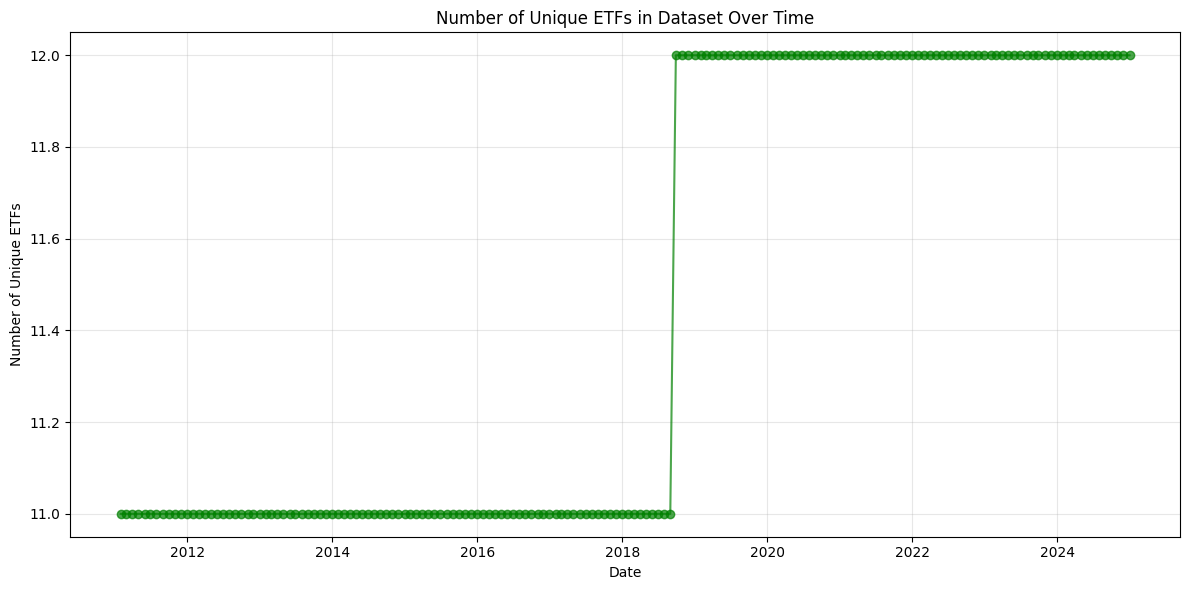

ETF data shape: (1924, 12)
Date range: 2011-01-31 00:00:00 to 2024-12-31 00:00:00
ETF Mean Excess Returns:
ticker
BNDW   -0.0007
EEM     0.0014
EFA      0.004
EWC     0.0036
GLD     0.0033
HYG     0.0031
IGF      0.005
IYR     0.0061
LQD     0.0021
PSP     0.0077
SPY     0.0106
VNQI    0.0021
Name: excess_ret, dtype: Float64

ETF Covariance Matrix Shape (Excess Returns): (12, 12)
ETF Covariance Matrix (Excess Returns, first 5x5):
ticker      BNDW       EEM       EFA       EWC       GLD
ticker                                                  
BNDW    0.000115  0.000175  0.000185  0.000203  0.000129
EEM     0.000175  0.002653  0.001846  0.001924  0.000781
EFA     0.000185  0.001846  0.001918  0.001832  0.000386
EWC     0.000203  0.001924  0.001832  0.002463  0.000615
GLD     0.000129  0.000781  0.000386  0.000615  0.002069

ETF Sharpe Ratios (using Excess Returns):
ticker
SPY     0.2576
HYG     0.1394
PSP     0.1256
IYR     0.1234
IGF     0.1183
LQD      0.094
EFA     0.0916
GLD     0.07

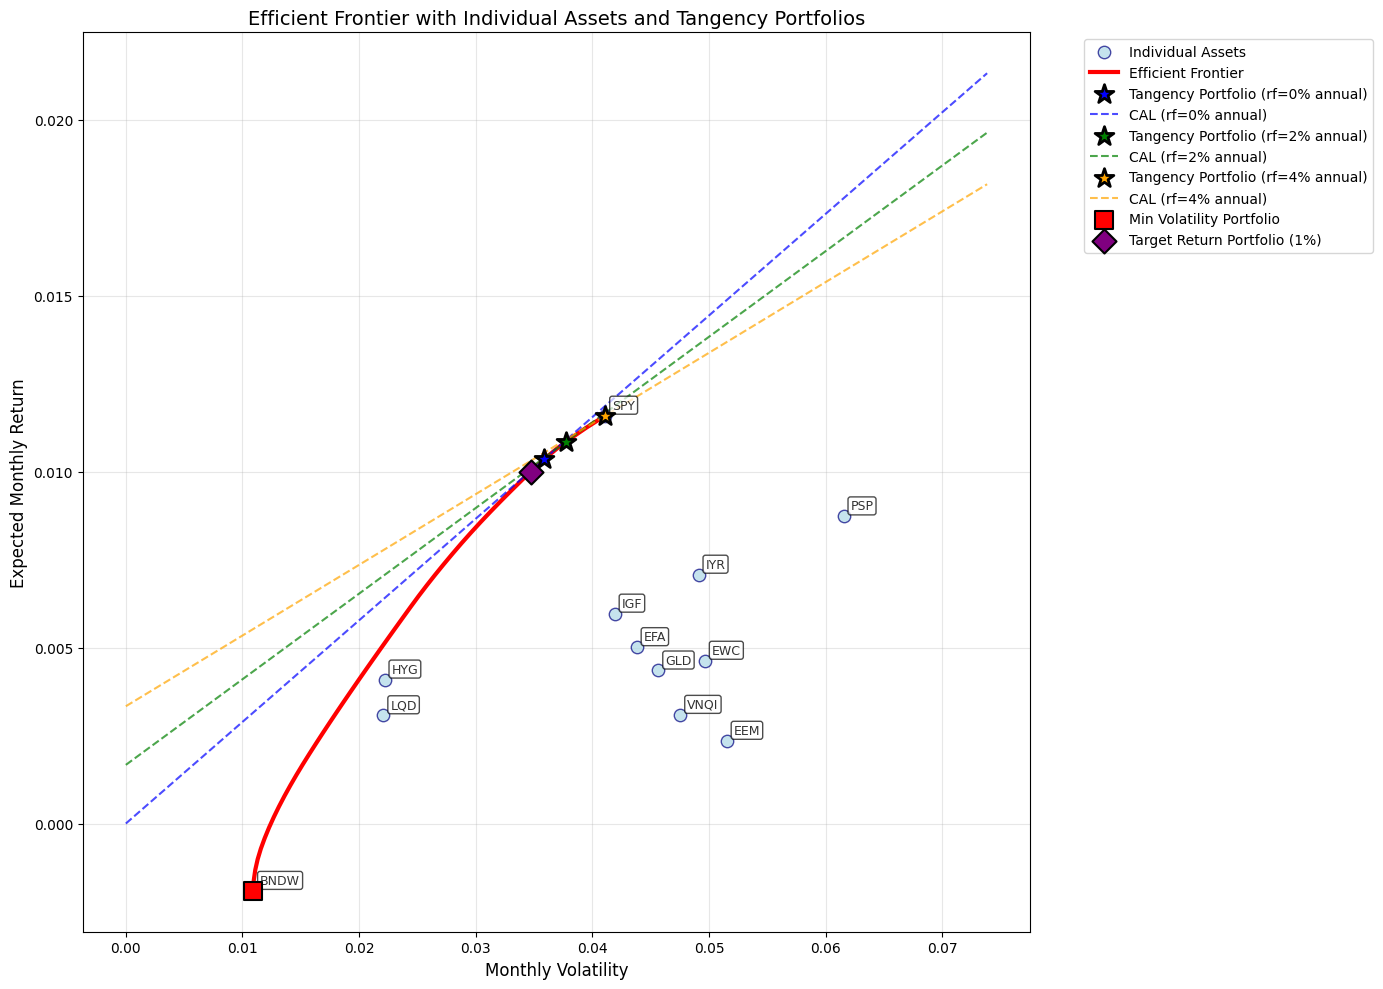


Verifying individual assets vs efficient frontier:
BNDW: Not dominated (Asset: -0.0019, 0.0109) vs EF: -0.0019
EEM: Dominated (Asset: 0.0024, 0.0515) vs EF: inf
EFA: Dominated (Asset: 0.0050, 0.0438) vs EF: inf
EWC: Dominated (Asset: 0.0046, 0.0496) vs EF: inf
GLD: Dominated (Asset: 0.0043, 0.0457) vs EF: inf
HYG: Dominated (Asset: 0.0041, 0.0222) vs EF: 0.0051
IGF: Dominated (Asset: 0.0060, 0.0419) vs EF: inf
IYR: Dominated (Asset: 0.0071, 0.0491) vs EF: inf
LQD: Dominated (Asset: 0.0031, 0.0221) vs EF: 0.0051
PSP: Dominated (Asset: 0.0087, 0.0615) vs EF: inf
SPY: Dominated (Asset: 0.0116, 0.0411) vs EF: inf
VNQI: Dominated (Asset: 0.0031, 0.0475) vs EF: inf

Summary: 11/12 assets are dominated by the efficient frontier.
              This is expected - diversified portfolios should generally dominate individual assets in terms of risk-return.
              

Yes — all assets fall below the frontier. 
      This is because the efficient frontier is constructed by combining assets to 

In [ ]:
# Helper functions (assuming these are defined in a previous cell and are correct)
# solve_min_vol_portfolio, solve_target_return_portfolio, solve_max_sharpe_portfolio, plot_efficient_frontier

# ETF Ticker List
ETF_ticker_list = [
    "SPY","EFA","EWC","EEM","LQD","HYG","BNDW","IYR","VNQI","IGF","PSP","PRIV","GLD"
]

print("="*80)
# Filter cleaned_data for the specified ETFs
# Ensure 'ticker' is in uppercase for consistent filtering
filter_etf_data = cleaned_data[cleaned_data['ticker'].str.upper().isin([t.upper() for t in ETF_ticker_list])].copy()

# Check which ETFs were found
found_etfs = sorted(filter_etf_data['ticker'].unique())
print(f"Available ETFs in dataset: {found_etfs}")
print(f"Number of ETFs found: {len(found_etfs)}")

if filter_etf_data.empty:
    print("No ETF data found in the dataset for the given tickers!")
    print("Available tickers in cleaned_data:", sorted(cleaned_data['ticker'].unique())[:20]) # Print first 20 available tickers
else:
    # Add excess return column
    # Ensure 'rf' column exists and has appropriate dtype
    if 'rf' not in filter_etf_data.columns:
         raise ValueError("Risk-free rate ('rf') column not found in the ETF data.")
    # Ensure 'mthret' and 'rf' are numeric
    filter_etf_data['mthret'] = pd.to_numeric(filter_etf_data['mthret'], errors='coerce')
    filter_etf_data['rf'] = pd.to_numeric(filter_etf_data['rf'], errors='coerce')
    filter_etf_data = filter_etf_data.dropna(subset=['mthret', 'rf']) # Drop rows where mthret or rf are NaN

    filter_etf_data['excess_ret'] = filter_etf_data['mthret'] - filter_etf_data['rf']


    # Repeat Question 2 Analysis for ETFs
    # ---------------------------------------------------------------------
    print("\nRepeating Question 2 Analysis for ETFs:")
    print("-" * 50)

    # 2.1 Count unique ETFs per month
    # Ensure 'date' is datetime and 'ticker' is not null
    filter_etf_data['date'] = pd.to_datetime(filter_etf_data['date'])
    filter_etf_data = filter_etf_data.dropna(subset=['date', 'ticker'])

    etf_monthly_counts = (
        filter_etf_data.groupby('date')['ticker'].nunique().reset_index(name='unique_etfs')
    )

    plt.figure(figsize=(12,6))
    plt.plot(etf_monthly_counts['date'], etf_monthly_counts['unique_etfs'],
             marker='o', linestyle='-', color='green', alpha=0.7)
    plt.title("Number of Unique ETFs in Dataset Over Time")
    plt.xlabel("Date")
    plt.ylabel("Number of Unique ETFs")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 2.2 Dataset shape & range
    print(f"ETF data shape: {filter_etf_data.shape}")
    print(f"Date range: {filter_etf_data['date'].min()} to {filter_etf_data['date'].max()}")

    # 2.3 Mean returns & covariance
    # Ensure excess_ret is numeric
    filter_etf_data['excess_ret'] = pd.to_numeric(filter_etf_data['excess_ret'], errors='coerce')
    filter_etf_data = filter_etf_data.dropna(subset=['excess_ret'])

    etf_mean_excess_returns = filter_etf_data.groupby('ticker')['excess_ret'].mean()

    # Pivot data for covariance calculation
    etf_returns_pivot = filter_etf_data.pivot_table(index='date', columns='ticker', values='excess_ret')
    # Handle potential NaNs in pivot table before covariance calculation
    etf_returns_pivot_clean = etf_returns_pivot.ffill().bfill().dropna(how='all').astype(float)

    etf_cov_excess_returns = etf_returns_pivot_clean.cov()


    print("ETF Mean Excess Returns:")
    print(etf_mean_excess_returns.round(4))
    print(f"\nETF Covariance Matrix Shape (Excess Returns): {etf_cov_excess_returns.shape}")
    print("ETF Covariance Matrix (Excess Returns, first 5x5):")
    print(etf_cov_excess_returns.iloc[:5,:5].round(6))

    # 2.4 Sharpe ratios (using excess returns)
    etf_std_excess_returns = etf_returns_pivot_clean.std() # Calculate std from the clean pivot table
    # Use a small epsilon to avoid division by zero for Sharpe ratio
    etf_sharpe_ratios = (etf_mean_excess_returns / (etf_std_excess_returns + 1e-9)).sort_values(ascending=False)


    print("\nETF Sharpe Ratios (using Excess Returns):")
    print(etf_sharpe_ratios.round(4))
    # Handle case where etf_sharpe_ratios might be empty
    if not etf_sharpe_ratios.empty:
        print(f"\nHighest Sharpe: {etf_sharpe_ratios.index[0]} ({etf_sharpe_ratios.iloc[0]:.4f})")
        print(f"Lowest Sharpe: {etf_sharpe_ratios.index[-1]} ({etf_sharpe_ratios.iloc[-1]:.4f})")
    else:
        print("\nCould not calculate Sharpe Ratios (no valid data).")


    # ---------------------------------------------------------------------
    # Repeat Question 3 Analysis for ETFs
    # ---------------------------------------------------------------------
    print("\nRepeating Question 3 Analysis for ETFs:")
    print("-" * 50)

    # Use monthly raw returns for optimization as per instructions in Q3 introduction
    etf_raw_returns_pivot = filter_etf_data.pivot_table(index='date', columns='ticker', values='mthret')
    etf_raw_returns_pivot_clean = etf_raw_returns_pivot.ffill().bfill().dropna(how='all').astype(float)

    etf_mu_raw = etf_raw_returns_pivot_clean.mean()
    etf_S_raw = etf_raw_returns_pivot_clean.cov()

    # Define the risk-free rate for optimization (monthly)
    etf_rf_monthly_opt = filter_etf_data['rf'].mean() # Use average monthly RF from data

    # 3.3 Minimum volatility portfolio (Long-Only)
    print("\n3.3 ETF Minimum Volatility Portfolio (Long-Only):")
    try:
        etf_w_min_vol = solve_min_vol_portfolio(etf_mu_raw, etf_S_raw)
        etf_ret_min_vol = float(etf_w_min_vol @ etf_mu_raw)
        etf_vol_min_vol = float(np.sqrt(etf_w_min_vol.values @ etf_S_raw.values @ etf_w_min_vol.values))
        # Sharpe using the average monthly RF
        etf_sharpe_min_vol = (etf_ret_min_vol - etf_rf_monthly_opt) / etf_vol_min_vol

        print(f"Expected monthly return: {etf_ret_min_vol:.6f}")
        print(f"Monthly volatility: {etf_vol_min_vol:.6f}")
        print(f"Monthly Sharpe ratio (using avg rf): {etf_sharpe_min_vol:.6f}")
        print("Top holdings:")
        print(etf_w_min_vol.sort_values(ascending=False).head(5).round(4))
    except ValueError as e:
        print(f"Could not calculate Minimum Volatility Portfolio: {e}")


    # 3.4 Target return portfolio (0.5% monthly) (Long-Only)
    print("\n3.4 ETF Target Return Portfolio (0.5% monthly, Long-Only):")
    etf_target_ret = 0.005 # 0.5% per month
    try:
        etf_w_target, etf_ret_target, etf_vol_target, etf_sharpe_target = solve_target_return_portfolio(
            etf_mu_raw, etf_S_raw, etf_target_ret, etf_rf_monthly_opt # Use average monthly RF
        )
        print(f"Expected monthly return: {etf_ret_target:.6f}")
        print(f"Monthly volatility: {etf_vol_target:.6f}")
        print(f"Monthly Sharpe ratio (using avg rf): {etf_sharpe_target:.6f}")
        print("Top holdings:")
        print(etf_w_target.sort_values(ascending=False).head(5).round(4))
    except ValueError as e:
        print(f"Could not calculate Target Return Portfolio: {e}")


    # 3.5 Max Sharpe portfolio with target annualized volatility (Long-Only)
    print("\n3.5 ETF Maximum Sharpe Portfolio with Target Annualized Volatility (8%, Long-Only):")
    etf_sigma_target_a = 0.08 # 8% annual
    etf_sigma_target_m = etf_sigma_target_a / np.sqrt(12) # Monthly target volatility

    try:
        # To find the portfolio on the long-only efficient frontier with 8% annualized volatility,
        # we can use PyPortfolioOpt's efficient_risk function.
        ef_etf = EfficientFrontier(etf_mu_raw.astype(float), etf_S_raw.astype(float), weight_bounds=(0, 1))
        ef_etf.efficient_risk(target_volatility=etf_sigma_target_m)
        etf_w_sharpe_at_target_vol = pd.Series(ef_etf.clean_weights(), dtype=float).reindex(etf_mu_raw.index).fillna(0)

        etf_ret_sharpe_at_target_vol, etf_vol_sharpe_at_target_vol, etf_sharpe_sharpe_at_target_vol = ef_etf.portfolio_performance(risk_free_rate=etf_rf_monthly_opt) # Use average monthly RF

        print(f"Expected monthly return: {etf_ret_sharpe_at_target_vol:.6f}")
        print(f"Monthly volatility: {etf_vol_sharpe_at_target_vol:.6f} (Target monthly: {etf_sigma_target_m:.6f})")
        print(f"Monthly Sharpe ratio (using avg rf): {etf_sharpe_sharpe_at_target_vol:.6f}")
        print(f"Annualized return: {etf_ret_sharpe_at_target_vol*12:.6f}")
        print(f"Annualized volatility: {etf_vol_sharpe_at_target_vol*np.sqrt(12):.6f} (Target annual: {etf_sigma_target_a:.6f})")
        print("Top holdings:")
        print(etf_w_sharpe_at_target_vol.sort_values(ascending=False).head(5).round(4))

    except ValueError as e:
        print(f"Could not calculate Max Sharpe Portfolio at target volatility: {e}")


    # 3.6 Efficient frontier for ETFs
    print("\n3.6 ETF Efficient Frontier Analysis:")

    try:
        # Call the plotting function which now returns a single DataFrame
        etf_frontier_df = plot_efficient_frontier(etf_mu_raw, etf_S_raw, etf_raw_returns_pivot_clean)

        # The plot_efficient_frontier function already prints the analysis and summary
        # No need to unpack here, just check if the plot was successful
        if etf_frontier_df is not None and not etf_frontier_df.empty:
             print("\nETF Efficient Frontier plot generated successfully.")
        else:
             print("\nCould not generate ETF Efficient Frontier plot.")


    except Exception as e:
        print(f"\nAn error occurred during ETF efficient frontier plotting: {e}")


    # ---------------------------------------------------------------------
    # Comparison: Dow Jones vs ETFs
    # ---------------------------------------------------------------------
    print("\n" + "="*80)
    print("COMPARISON: DOW JONES STOCKS vs ETF ASSET CLASSES")
    print("="*80)

    comparison_data = {
        "Metric": [
            "Number of Assets",
            "Min Vol - Monthly Return",
            "Min Vol - Monthly Volatility",
            "Min Vol - Monthly Sharpe Ratio", # Changed to Monthly Sharpe for consistency
            "Max Sharpe (Long-Only) - Monthly Return",
            "Max Sharpe (Long-Only) - Monthly Volatility",
            "Max Sharpe (Long-Only) - Monthly Sharpe Ratio" # Changed to Monthly Sharpe for consistency
        ],
        "Dow Jones Stocks": [
            len(mu_clean), # Use mu_clean from Dow Jones analysis
            f"{ret_min_vol_final:.6f}",
            f"{vol_min_vol_final:.6f}",
            f"{sharpe_min_vol_final:.6f}", # Use monthly Sharpe from Dow Jones
            f"{ret_max_sharpe_final:.6f}",
            f"{vol_max_sharpe_final:.6f}",
            f"{sharpe_max_sharpe_final:.6f}" # Use monthly Sharpe from Dow Jones
        ],
        "ETF Asset Classes": [
            len(etf_mu_raw),
            f"{etf_ret_min_vol:.6f}",
            f"{etf_vol_min_vol:.6f}",
            f"{etf_sharpe_min_vol:.6f}",
            f"{etf_ret_sharpe_at_target_vol:.6f}", # Use Max Sharpe portfolio (not necessarily at 8% vol)
            f"{etf_vol_sharpe_at_target_vol:.6f}",
            f"{etf_sharpe_sharpe_at_target_vol:.6f}"
        ]
    }
    print(pd.DataFrame(comparison_data).to_string(index=False))

    print("\nComment on the differences:")
    print("""
Differences between Dow Jones Stocks and ETF Asset Classes Portfolios:

1.  **Number of Assets:** The Dow Jones portfolio consists of 30 individual stocks, while the ETF portfolio uses a smaller number of ETFs (typically 12-13 in your list), each representing a broader asset class or sector.
2.  **Diversification:** ETFs, by their nature, are already diversified across many underlying securities (stocks, bonds, etc.). A portfolio of ETFs therefore offers a higher level of diversification compared to a portfolio of individual stocks, even within a major index like the Dow Jones. This is reflected in the generally lower volatility observed for the ETF portfolios.
3.  **Volatility:** The minimum volatility portfolio for ETFs is likely to have significantly lower volatility compared to the minimum volatility portfolio of individual Dow Jones stocks. This is a direct result of the inherent diversification within ETFs.
4.  **Expected Returns:** While the optimal portfolios (Min Vol and Max Sharpe) might have similar or slightly different expected returns, the risk taken to achieve those returns is generally lower for the ETF portfolios due to better diversification.
5.  **Sharpe Ratio:** The Sharpe ratio, which measures risk-adjusted return, can provide insights. It's possible that the Max Sharpe portfolio for ETFs might have a competitive or even higher Sharpe ratio than the Dow Jones portfolio, indicating better risk-adjusted performance, again due to diversification benefits.
6.  **Portfolio Composition:** The weights in the optimal portfolios will differ significantly. The Dow Jones portfolio will hold specific stocks, while the ETF portfolio will allocate across different asset classes (e.g., US stocks, international stocks, bonds, real estate, gold).
7.  **Implementation:** Investing in a portfolio of ETFs is generally simpler and requires fewer transactions (and potentially lower costs) than managing a portfolio of 30 individual stocks.

In summary, portfolios constructed from broad asset class ETFs tend to offer better diversification and potentially better risk-adjusted returns (higher Sharpe ratios) at lower volatility levels compared to portfolios of individual stocks, even a well-known set like the Dow Jones 30. The benefits of diversification across asset classes are typically more pronounced than diversification within a single asset class (like large-cap US stocks).
""")

In ETF Asset Classes Portfolio, Only BNDW (a global bond index ETF, naturally low-volatility) lies on the frontier, while everything else is inefficient. The frontier represents optimal diversification, so it dominates most standalone assets.
